# Изучение библиотеки Seaborn

[Библиотека Seaborn](https://seaborn.pydata.org/examples/index.html)

In [677]:
from sklearn import tree
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
import numpy as np     
%matplotlib inline

In [3]:
players = pd.read_csv('csv/players.csv')

In [4]:
players.head(1)

Unnamed: 0           Name        Position  Age  \
0           0  Kylian Mbappé  Centre-Forward   22   

   Markey Value In Millions(£) Country                 Club  Matches  Goals  \
0                        144.0  France  Paris Saint-Germain       16      7   

   Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
0          0       11             3                    0          0   

   Number Of Substitute In  Number Of Substitute Out  
0                        0                         8

In [582]:
df = sns.load_dataset("anscombe")
diamonds = sns.load_dataset("diamonds")
fmri = sns.load_dataset("fmri")
penguin = sns.load_dataset("penguins")
dots = sns.load_dataset("dots")
tips = sns.load_dataset("tips")
dfe = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
planets = sns.load_dataset("planets")
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")
geyser = sns.load_dataset("geyser")
titanic = sns.load_dataset("titanic")


In [6]:
players = players.rename(columns={'Unnamed: 0':'Index', 'Markey Value In Millions(£)':'Price'})

In [97]:
test_play1 = players.query("Club == 'Bayern Munich' or Club == 'Real Madrid'or Club == 'Liverpool FC'or Club == 'Arsenal FC'")
test_play2 = test_play1.query("Country == 'Spain' or Country == 'Germany' or Country == 'Brazil'or Country == 'England'")
test_play3 = players.query("Country == 'England' or Country == 'France'")
test_play3 = test_play3.query("Club == 'Tottenham Hotspur' or Club == 'Arsenal FC' or Club == 'Manchester United' or Club == 'Manchester City'")

## Anscombe’s quartet
[sns.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)

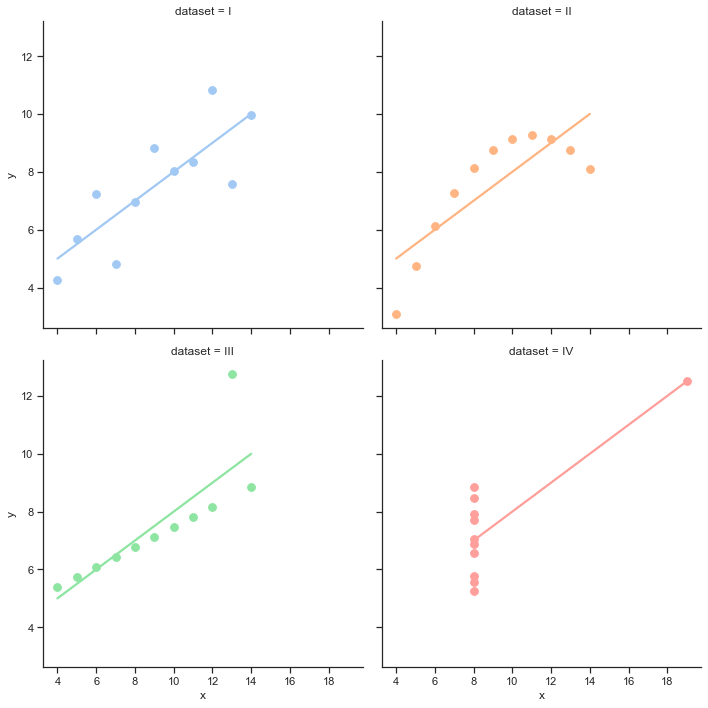

In [8]:
sns.set_theme(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="pastel", height=5,
           scatter_kws={"s": 60, "alpha": 1})

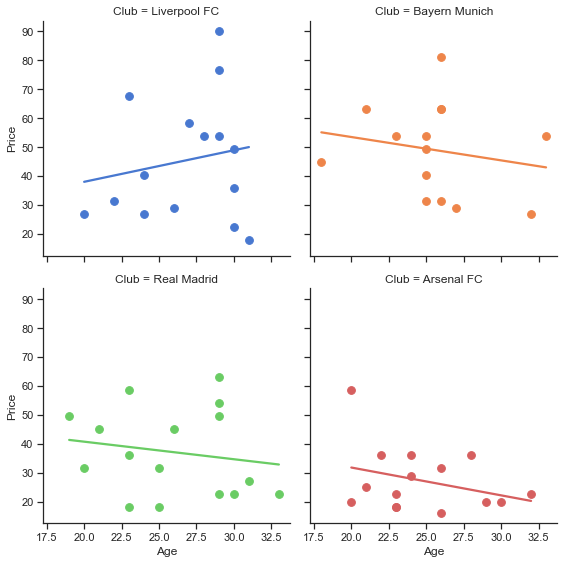

In [55]:
sns.lmplot(x="Age", y="Price", col="Club", hue="Club", data=test_play1,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 60, "alpha": 1})

# Scatterplot with multiple semantics
[sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

<AxesSubplot:xlabel='carat', ylabel='price'>

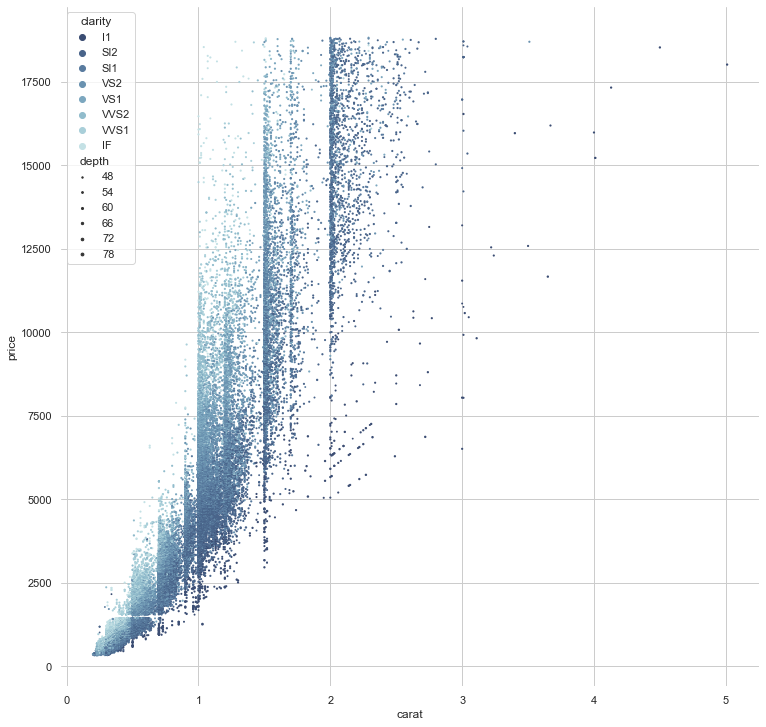

In [34]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12.5, 12.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

<AxesSubplot:xlabel='Matches', ylabel='Price'>

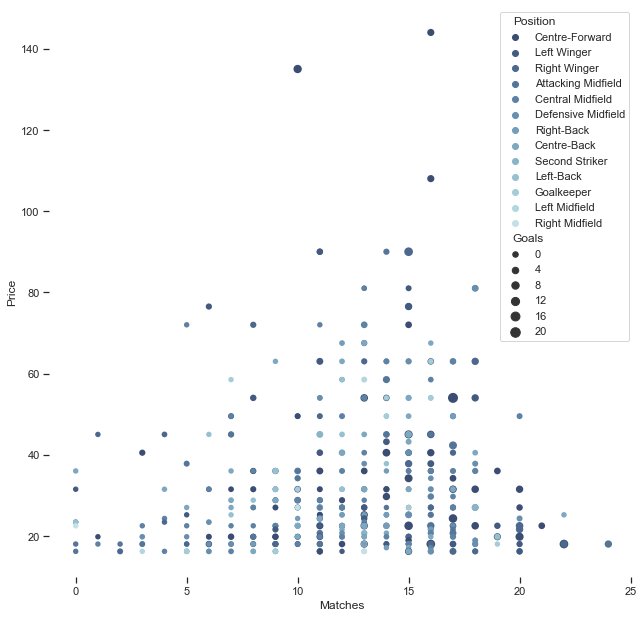

In [47]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Matches", y="Price",
                hue="Position", size="Goals",
                palette="ch:r=-.2,d=.3_r",
                sizes=(30, 100), linewidth=0,
                data=players, ax=ax)

# Timeseries plot with error bands
[sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

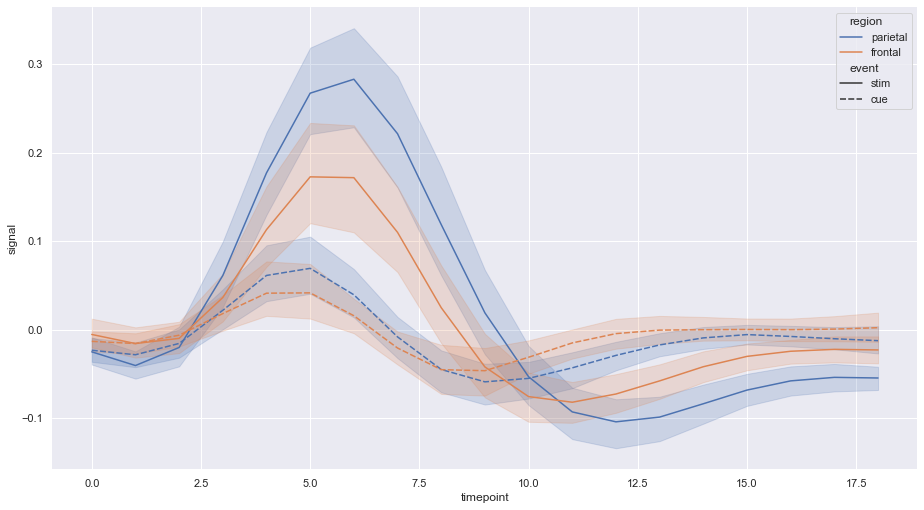

In [179]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15.5, 8.5))
sns.despine(f, left=True, bottom=True)
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

<AxesSubplot:xlabel='Age', ylabel='Matches'>

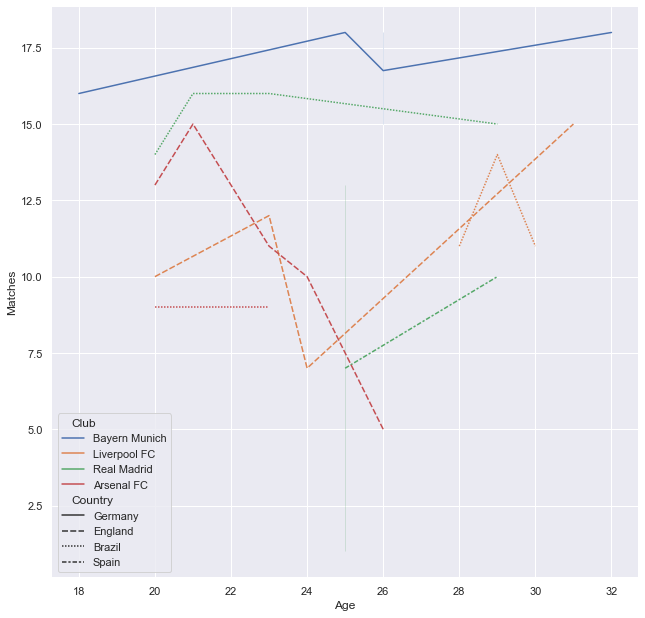

In [64]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
sns.lineplot(x="Age", y="Matches",
             hue="Club", style="Country",
             data=test_play2)

# Facetting histograms by subsets of data
[sns.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

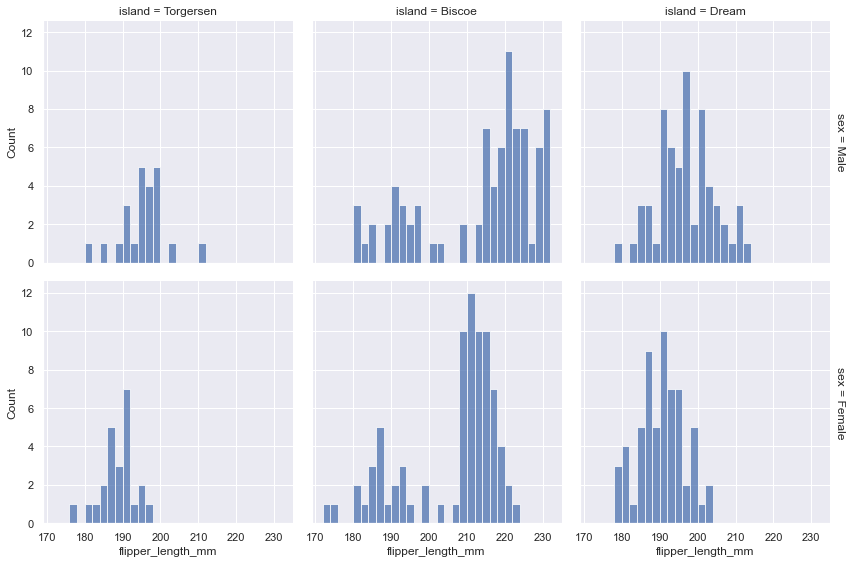

In [86]:
sns.set_theme(style='darkgrid')
sns.displot(
    penguin, x="flipper_length_mm", col="island", row="sex",
    binwidth=2, height=4, facet_kws=dict(margin_titles=True),
)

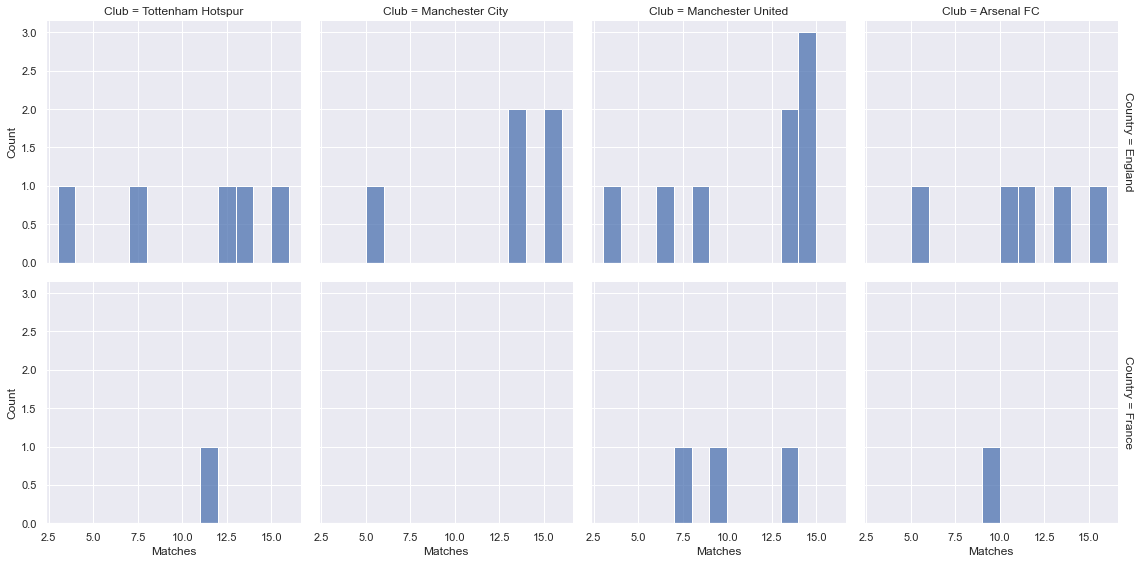

In [99]:
sns.set_theme(style='darkgrid')
sns.displot(
    test_play3, x="Matches", col="Club", row="Country",
    binwidth=1, height=4, facet_kws=dict(margin_titles=True),
)

# Line plots on multiple facets
[sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

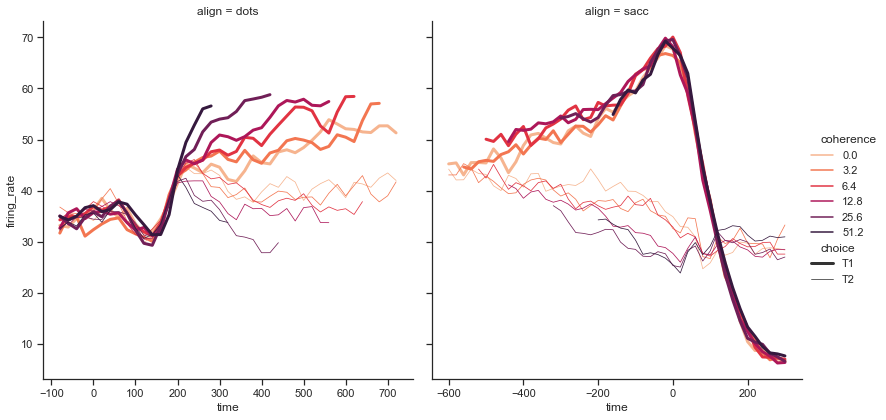

In [109]:
sns.set_theme(style="ticks")
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=6, aspect=.95, facet_kws=dict(sharex=False),
)

# Grouped barplots
[sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

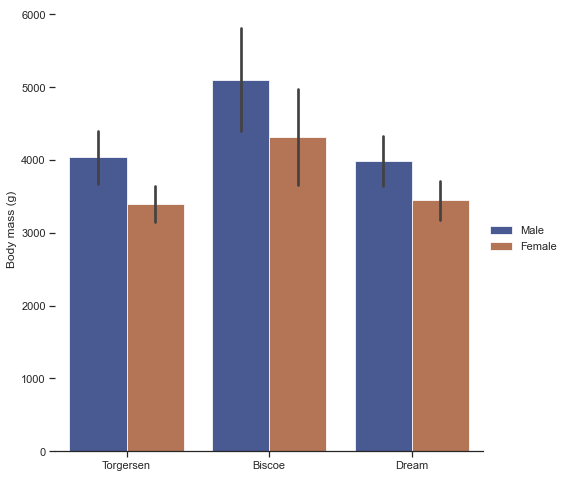

In [133]:
g = sns.catplot(
    data=penguin, kind="bar",
    x="island", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.76, height=7
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# Grouped boxplots
[sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

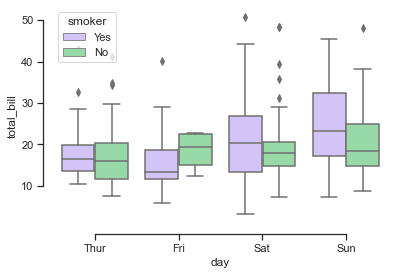

In [149]:
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

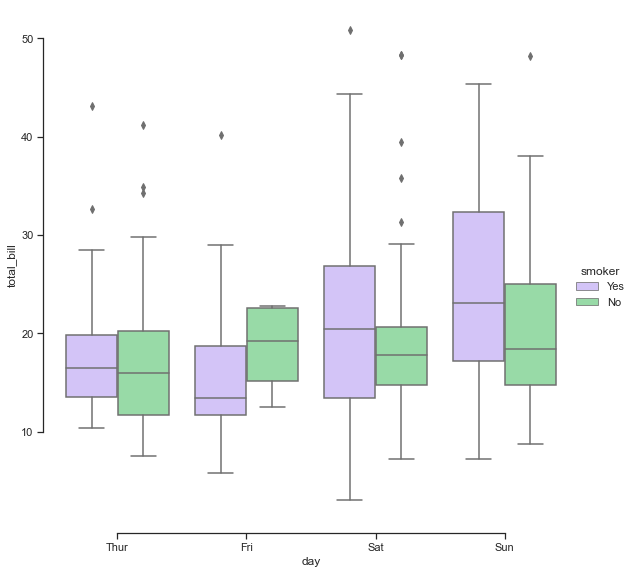

In [147]:
sns.catplot(
    data=tips, kind="box",
    x="day", y="total_bill", hue="smoker", palette=["m", "g"], height=8
)
sns.despine(offset=10, trim=True)

# Grouped violinplot with split violins
[sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

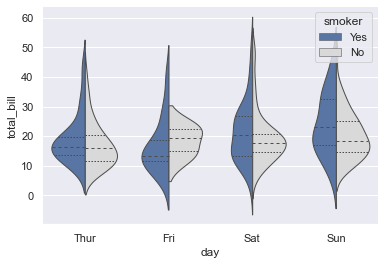

In [162]:
sns.set_theme(style="darkgrid")
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

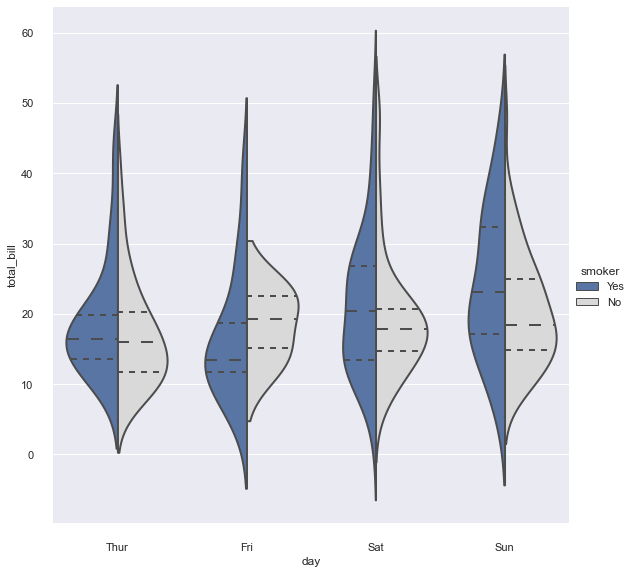

In [169]:
sns.set_theme(style="darkgrid")
sns.catplot(
    data=tips, kind="violin",
    x="day", y="total_bill", hue="smoker", split=True, inner="quart", linewidth=2, \
    palette={"Yes": "b", "No": ".85"}, height=8
)
sns.despine(offset=10, trim=True)

# Scatterplot heatmap
[sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

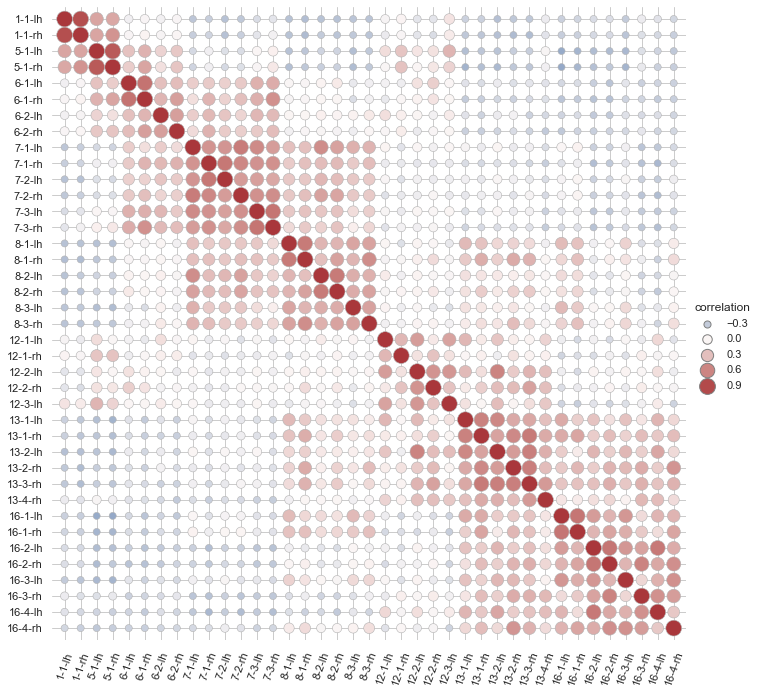

In [215]:
sns.set_theme(style="whitegrid")
used_networks = [1, 5, 6, 7, 8, 12, 13, 16]
used_columns = (dfe.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
dfer = dfe.loc[:, used_columns]
dfer.columns = dfer.columns.map("-".join)
corr_mat = dfer.corr().stack().reset_index(name="correlation")
#hue_norm - [x,y] between norm
#edgecolor - circles border
#sizes and size_norm - [x,y] from lil to big
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
#delete plot borders
g.despine(left=True, bottom=True)
#distance from borders
g.ax.margins(.02)
#angle of inclination
for label in g.ax.get_xticklabels():
    label.set_rotation(70)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".5")

# Hexbin plot with marginal distributions
[sns.joinplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

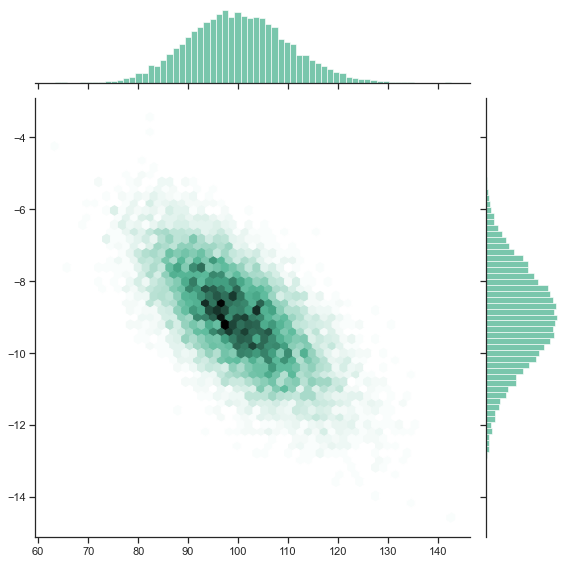

In [236]:
sns.set_theme(style="ticks")

rs = np.random.RandomState(30)
x = rs.gamma(100, size=10000)
y = -.090 * x + rs.normal(size=10000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391", height=8)

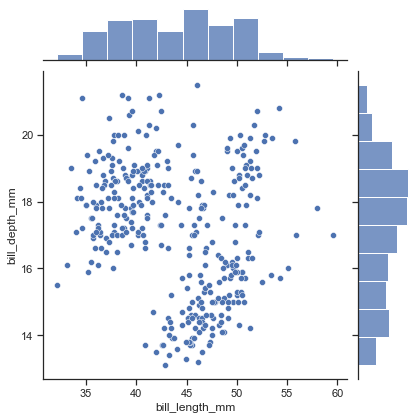

In [228]:
sns.jointplot(data=penguin, x="bill_length_mm", y="bill_depth_mm")

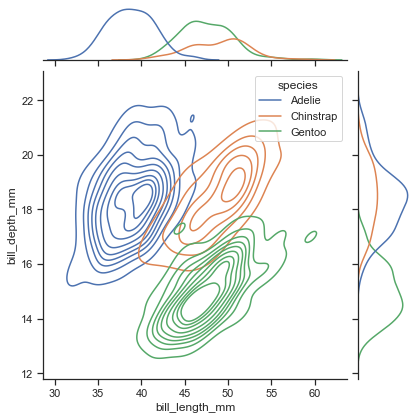

In [230]:
sns.jointplot(data=penguin, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")


# Stacked histogram on a log scale
[sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

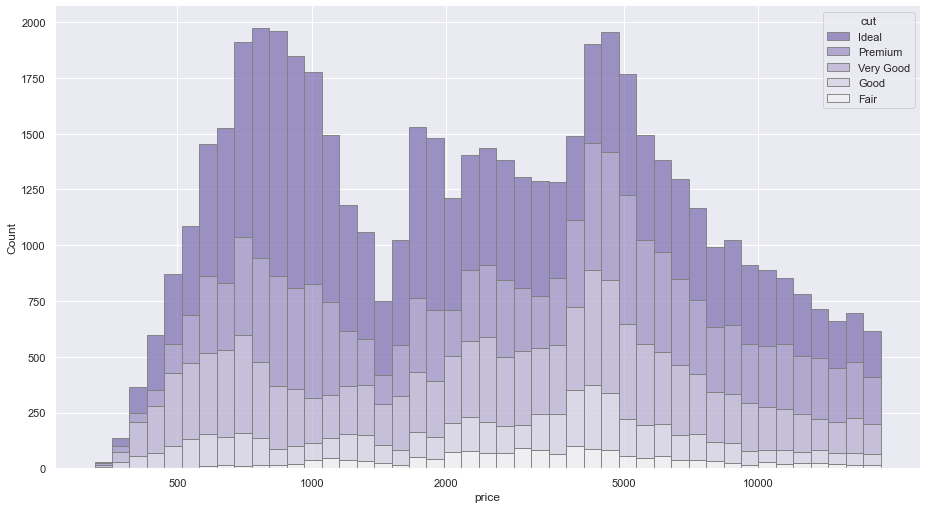

In [253]:
sns.set_theme(style='darkgrid')
f, ax = plt.subplots(figsize=(15.5, 8.5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".5",
    linewidth=.9,
    log_scale=True,
)
#change bottom price
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

# Horizontal boxplot with observations
[sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot), [sns.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)

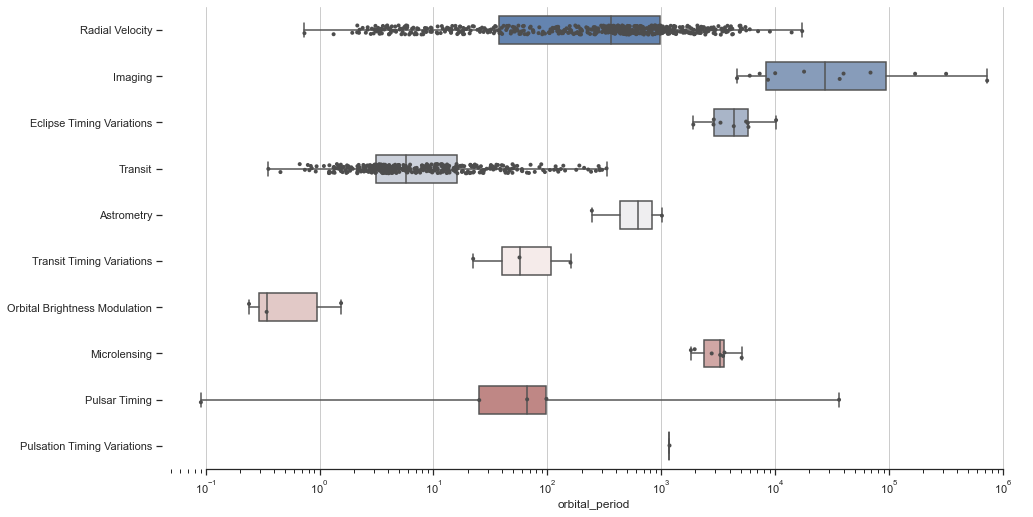

In [280]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15.5, 8.5))
#600000 to 10^5 
ax.set_xscale("log")
sns.boxplot(x="orbital_period", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="orbital_period", y="method", data=planets,
              size=4, color=".3", linewidth=0)
#vertical lines
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Relational plots - Реляционные графики/модели
## [sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)
- 1.[sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) - dots
- 2.[sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) - line

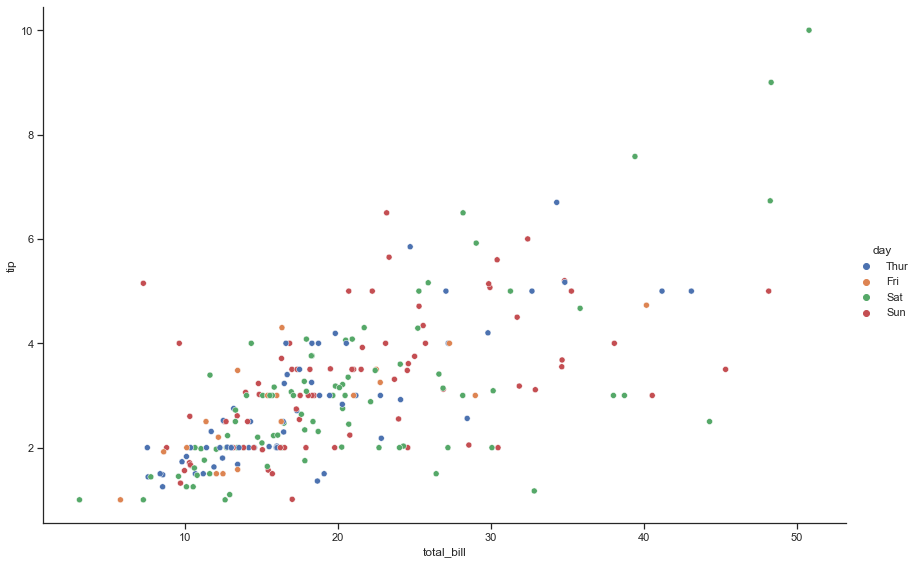

In [295]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", height=8, aspect=1.5)

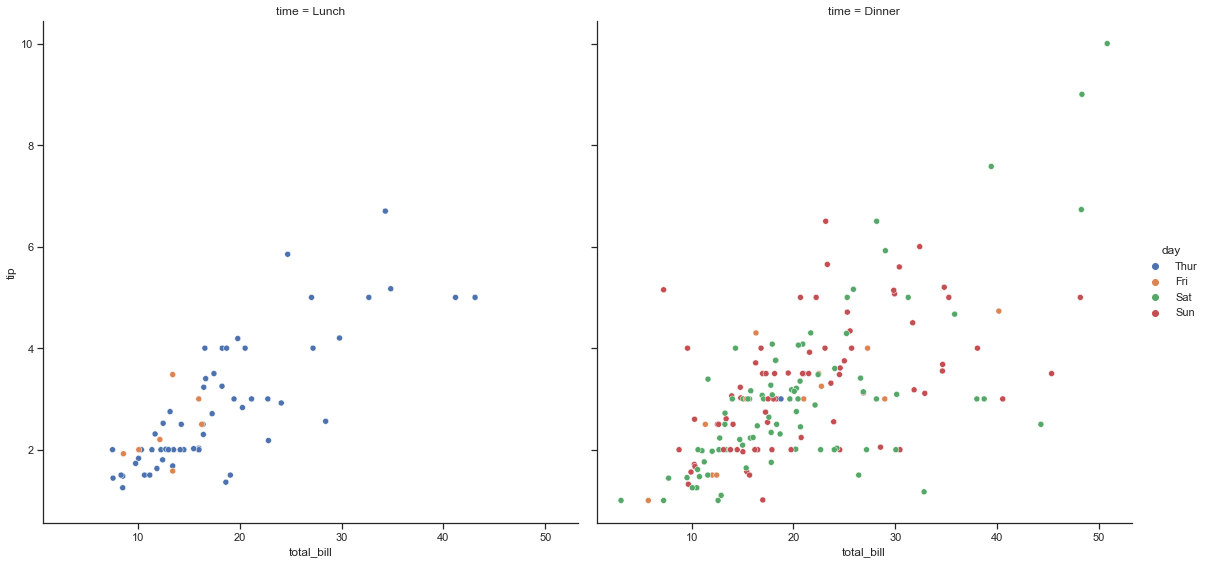

In [296]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", height=8, col='time')

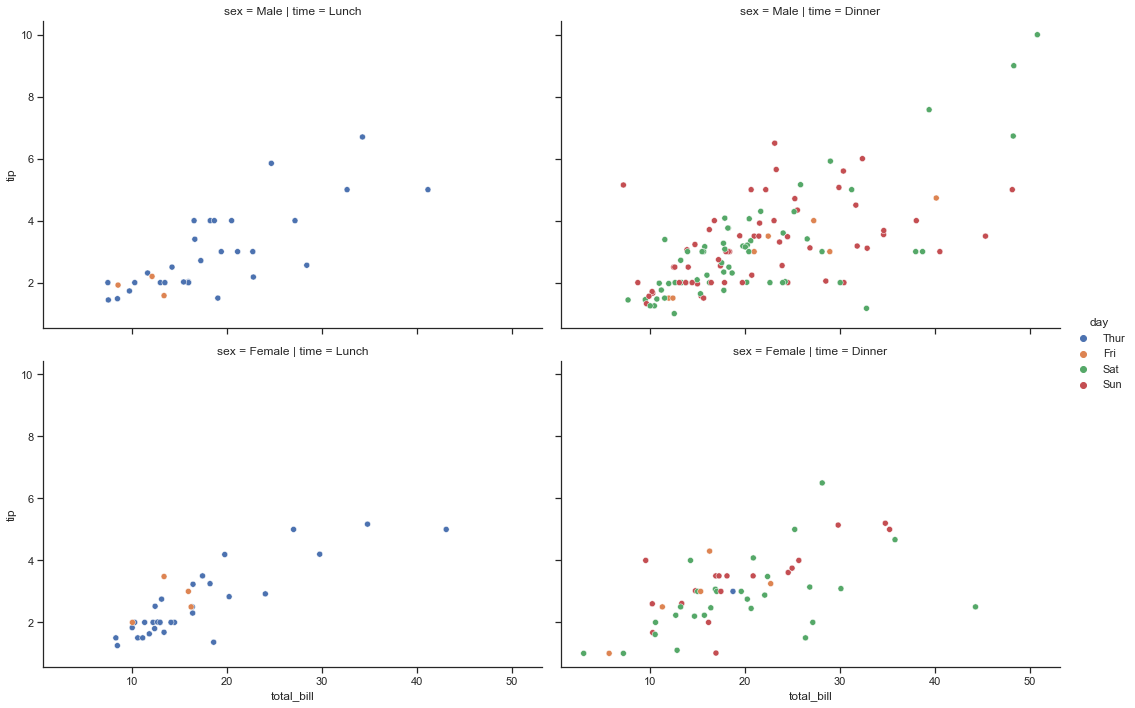

In [298]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex", aspect=1.5)

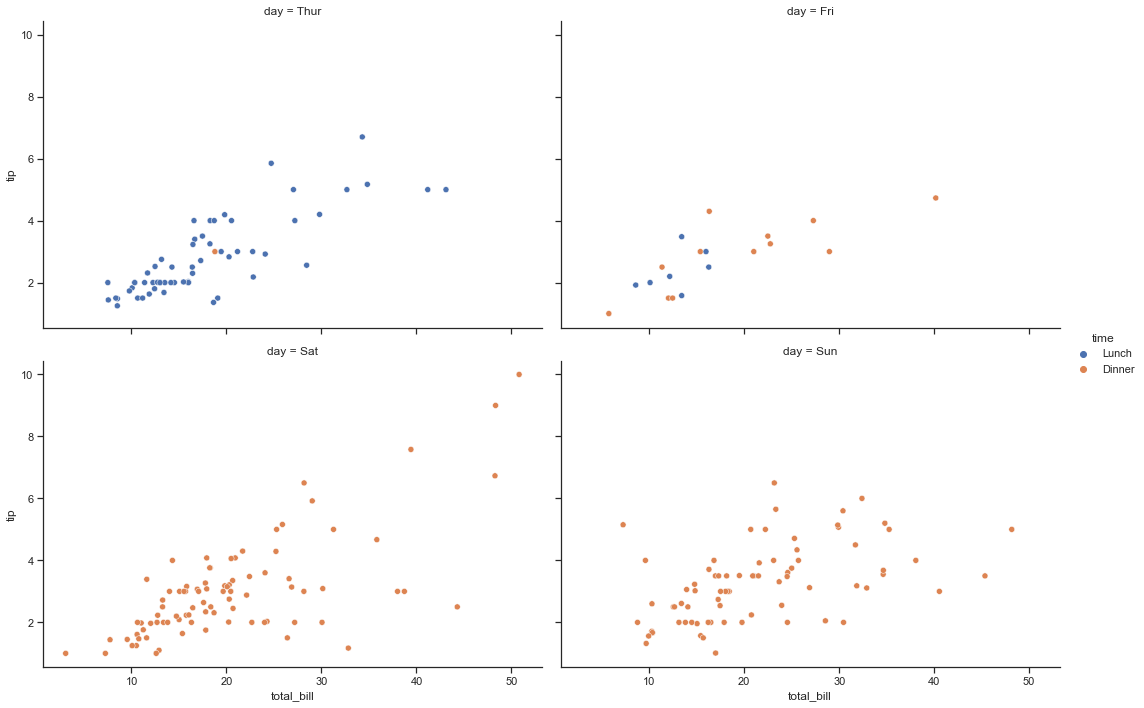

In [299]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2, aspect=1.5)

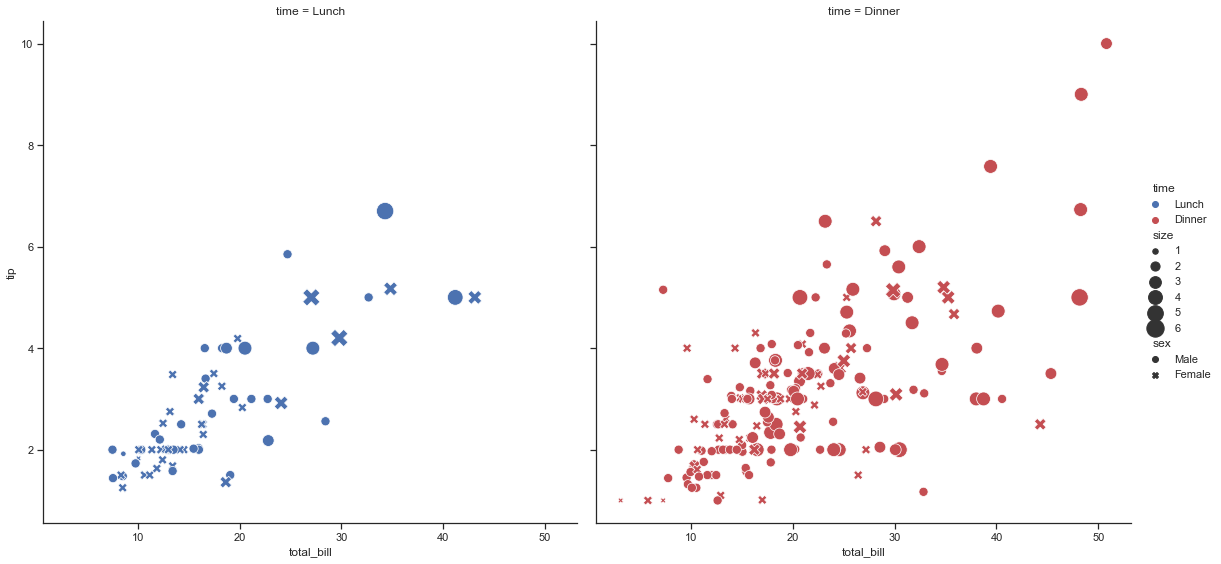

In [306]:
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(30, 300),height=8
)

### Line

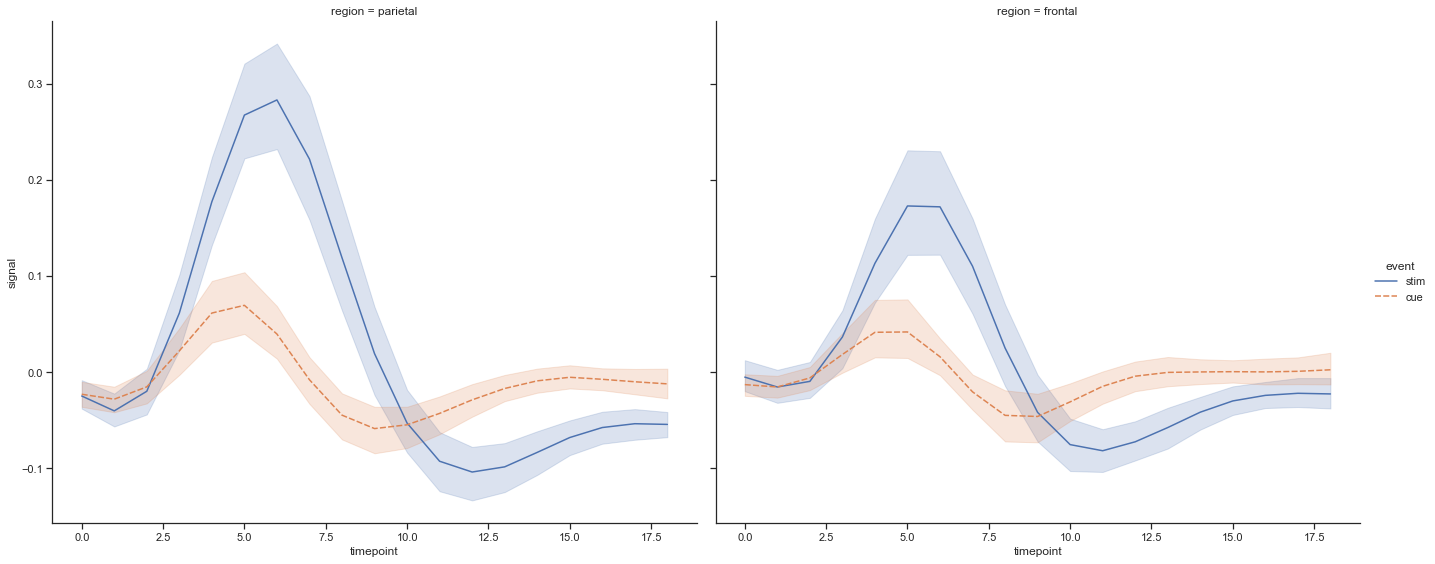

In [313]:
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line", height=8, aspect=1.2
)

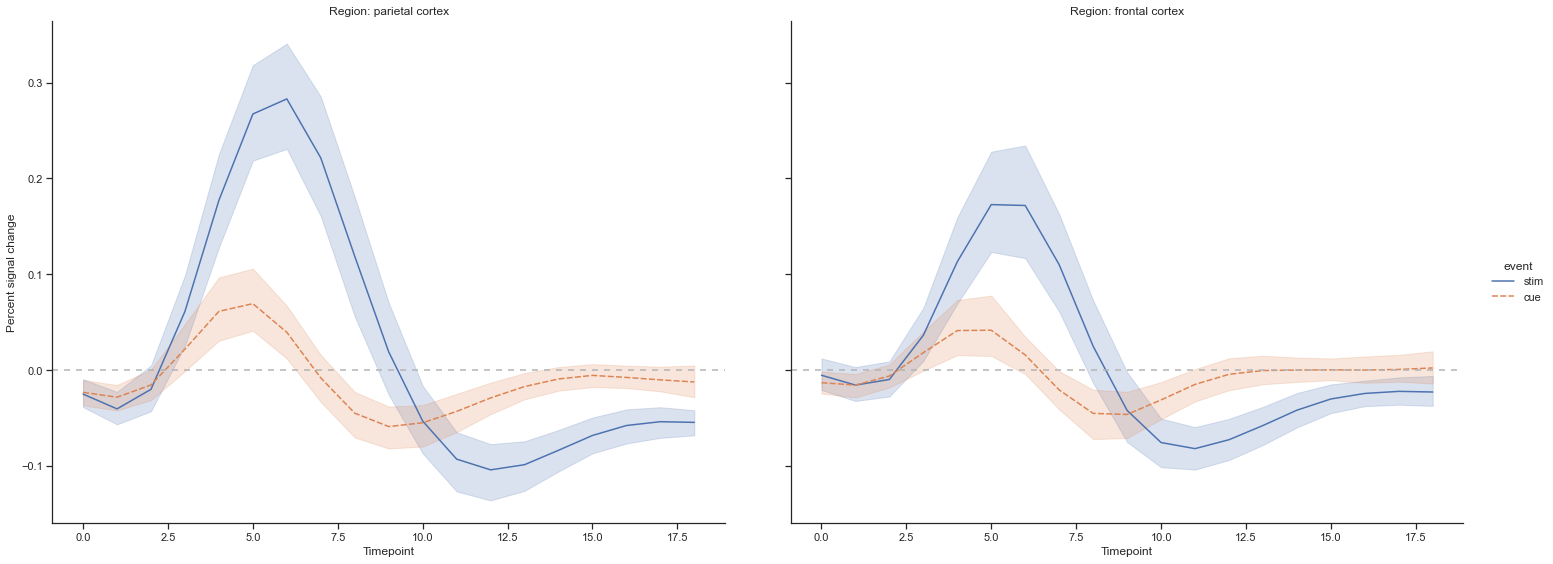

In [328]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=8, aspect=1.3, kind="line"
)
#axhline - main line
#dashes - dotted line
#tight_layout - distanse between graphics
(g.map(plt.axhline, y=0, color=".7", dashes=(4, 4))
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=5))

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

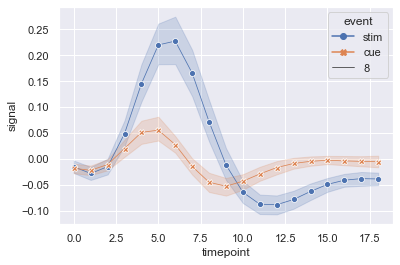

In [336]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

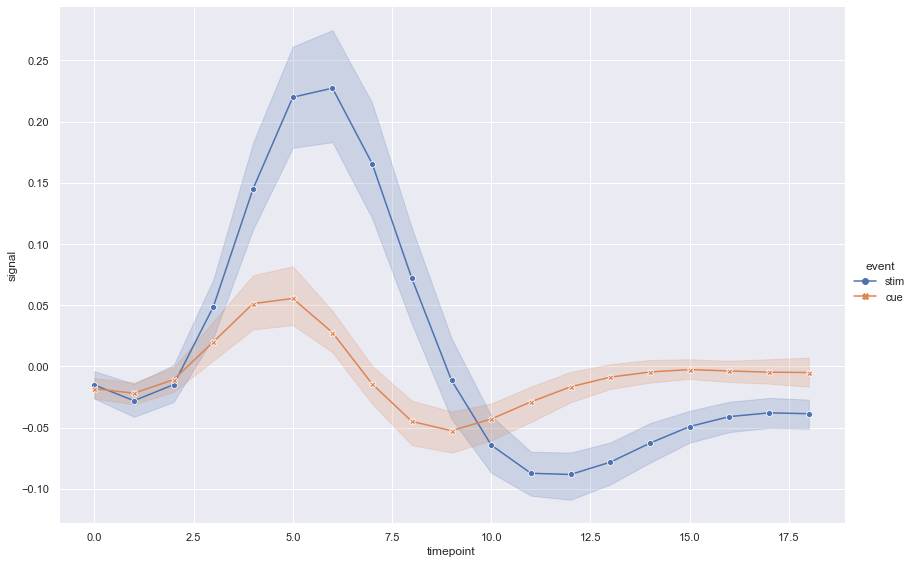

In [339]:
sns.relplot(data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False, kind='line', height=8, aspect=1.5)

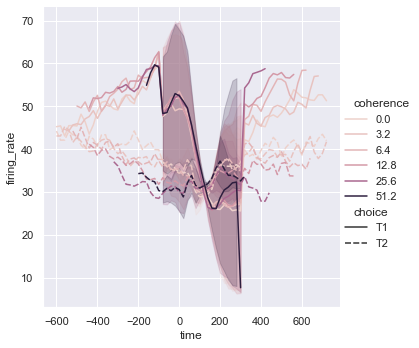

In [344]:
sns.relplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice", kind='line'
)

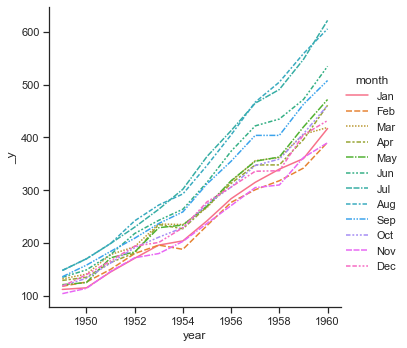

In [330]:
sns.relplot(data=flights_wide, kind="line")

### Dots

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

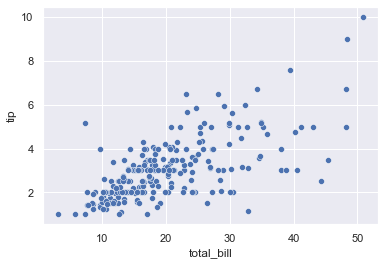

In [332]:
sns.set_style(style='darkgrid')
sns.scatterplot(data=tips, x="total_bill", y="tip")

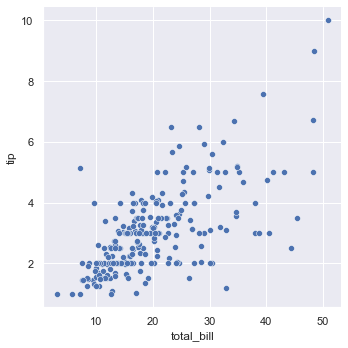

In [333]:
sns.set_style(style='darkgrid')
sns.relplot(data=tips, x="total_bill", y="tip")

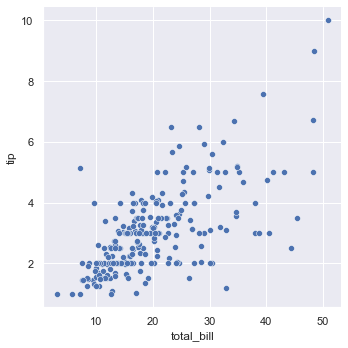

In [334]:
sns.set_style(style='darkgrid')
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter')

# Distribution plots - Распределение
## [sns.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)
- [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) (with kind="hist"; the default) - histogram
- [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) (with kind="kde") - histogram line + puddle
- [sns.ecdfplot](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) (with kind="ecdf"; univariate-only) - ladder  

## [sns.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) - scatterplot + info from borders
## [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) - DEPRECATED

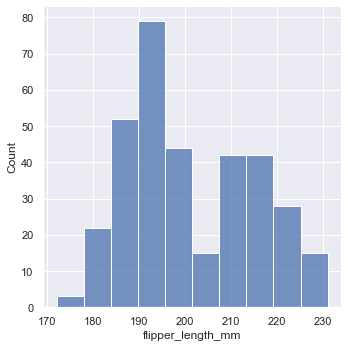

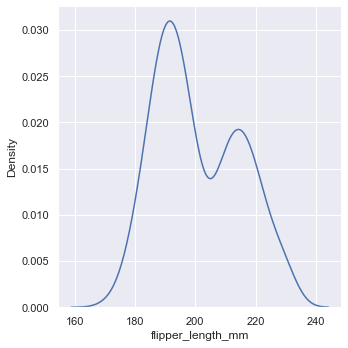

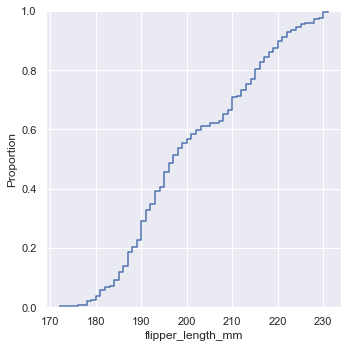

In [349]:
sns.displot(data=penguins, x="flipper_length_mm")
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

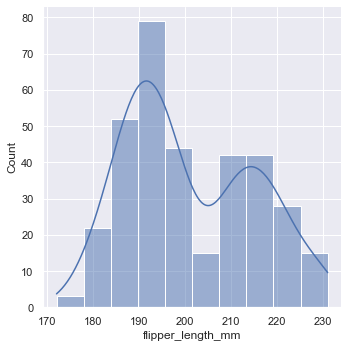

In [352]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

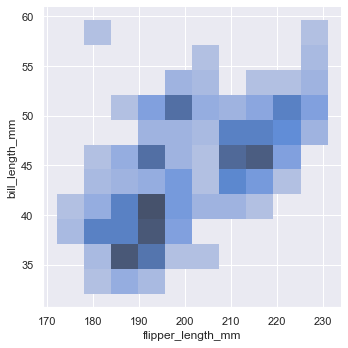

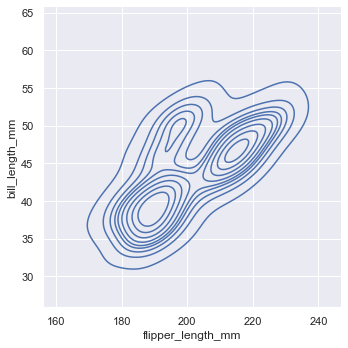

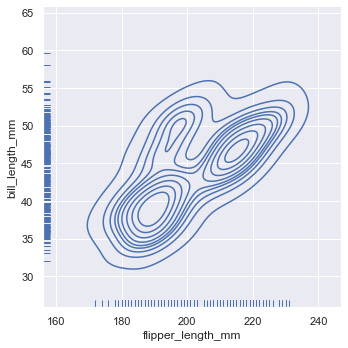

In [360]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

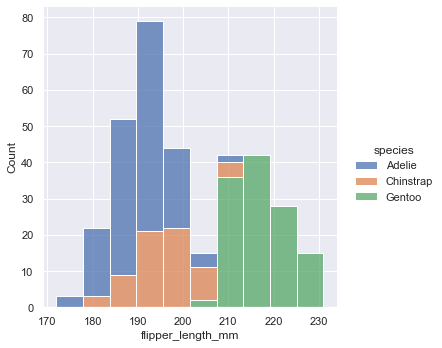

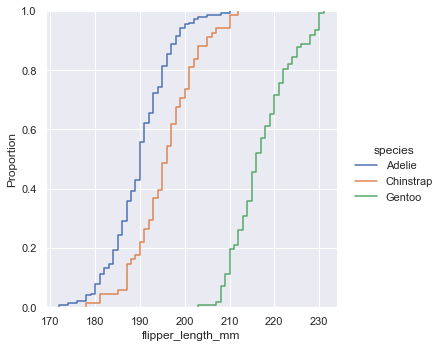

In [368]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="hist", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="ecdf")

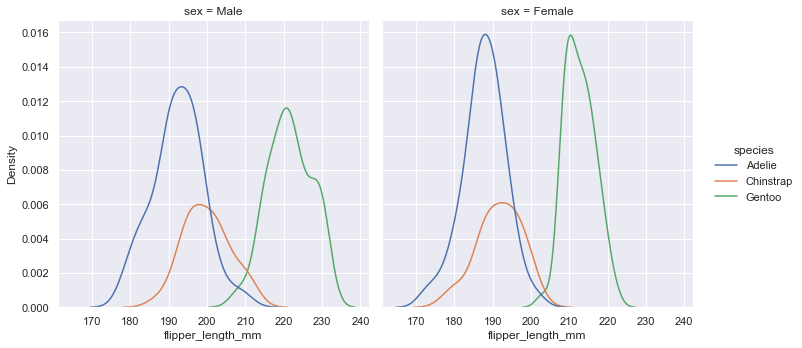

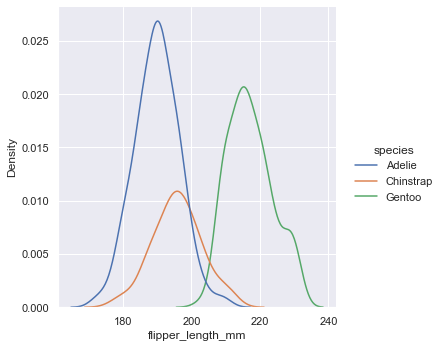

In [367]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")


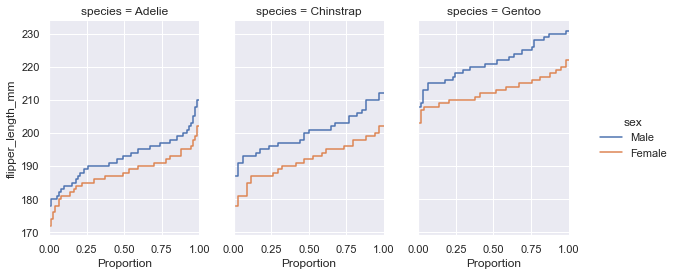

In [369]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)

### Elements

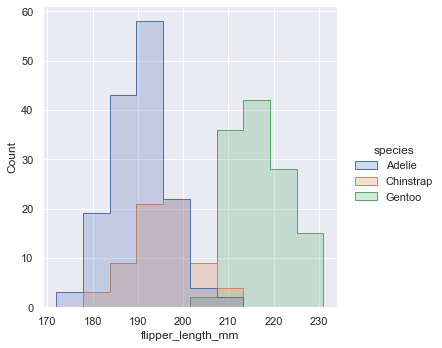

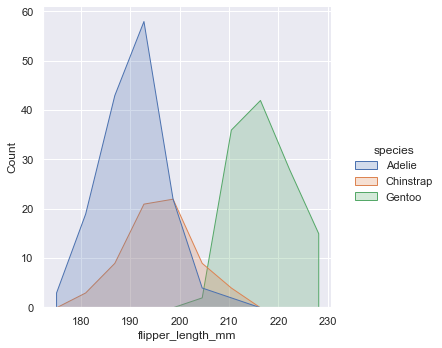

In [371]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")
sns.displot(penguins, x="flipper_length_mm", hue="species", element="poly")

### Multiple

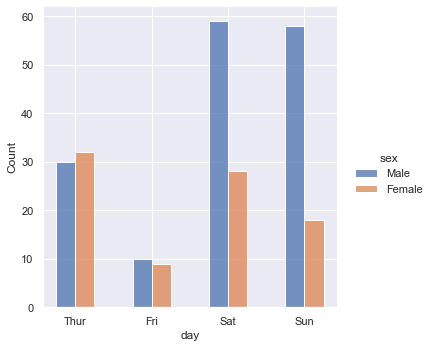

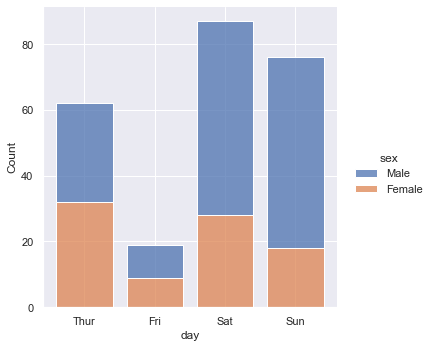

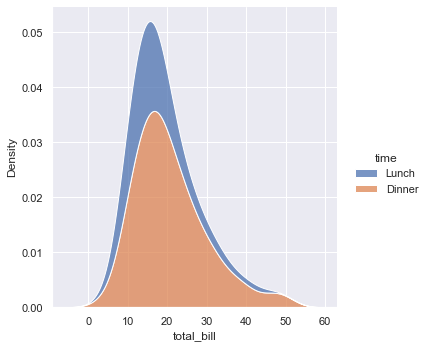

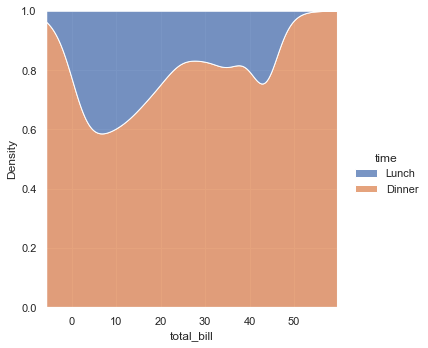

In [388]:
sns.displot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.5)
sns.displot(data=tips, x="day", hue="sex", multiple="stack", shrink=.8)
sns.displot(data=tips, x="total_bill", hue="time", multiple="stack", kind='kde')
sns.displot(data=tips, x="total_bill", hue="time", multiple="fill", kind='kde')



### Log

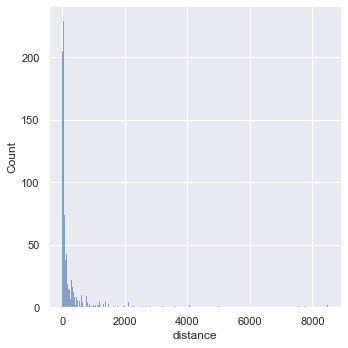

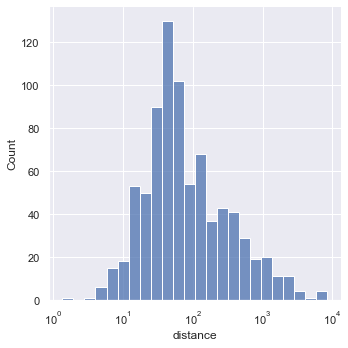

In [382]:
sns.displot(data=planets, x="distance")
sns.displot(data=planets, x="distance", log_scale=True)

### Fill

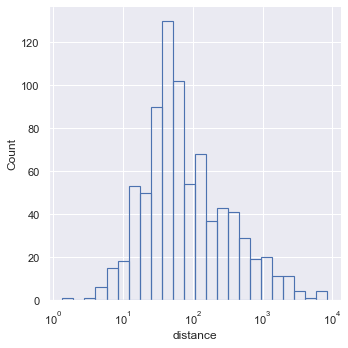

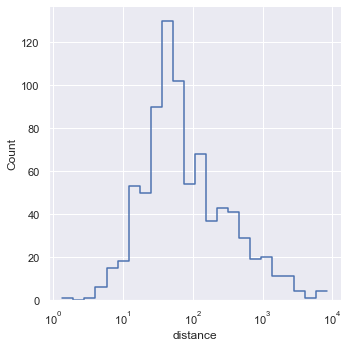

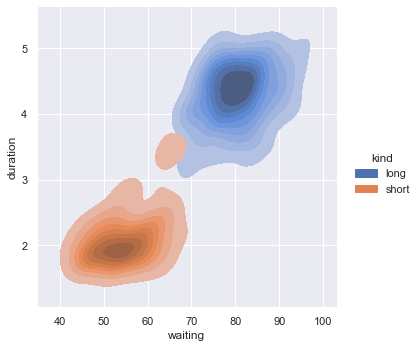

In [391]:
sns.displot(data=planets, x="distance", log_scale=True, fill=False)
sns.displot(data=planets, x="distance", log_scale=True, fill=False, element='step')
sns.displot(
    data=geyser, x="waiting", y="duration", hue="kind", fill=True, kind='kde'
)

### Discrete

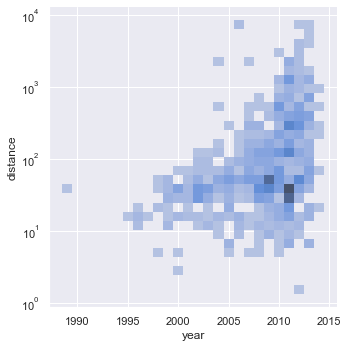

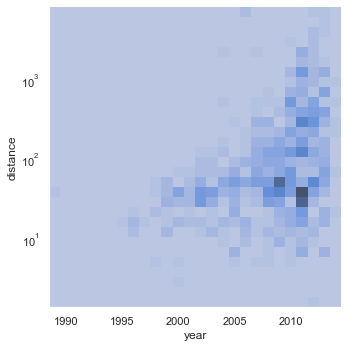

In [386]:
sns.displot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
)
sns.displot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),thresh=None
)

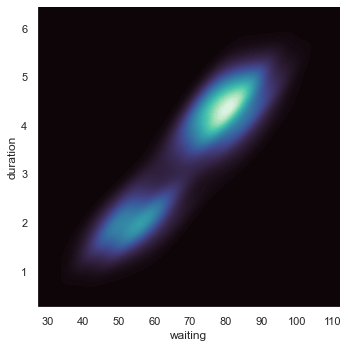

In [392]:
sns.displot(
    data=geyser, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="mako",kind='kde'
)

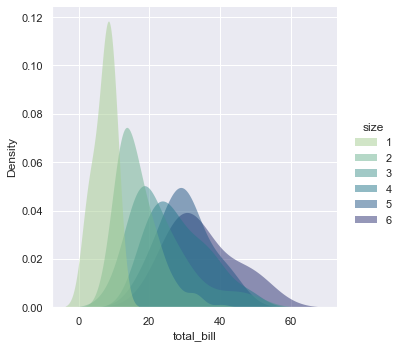

In [393]:
sns.displot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, kind='kde'
)

<AxesSubplot:xlabel='carat', ylabel='price'>

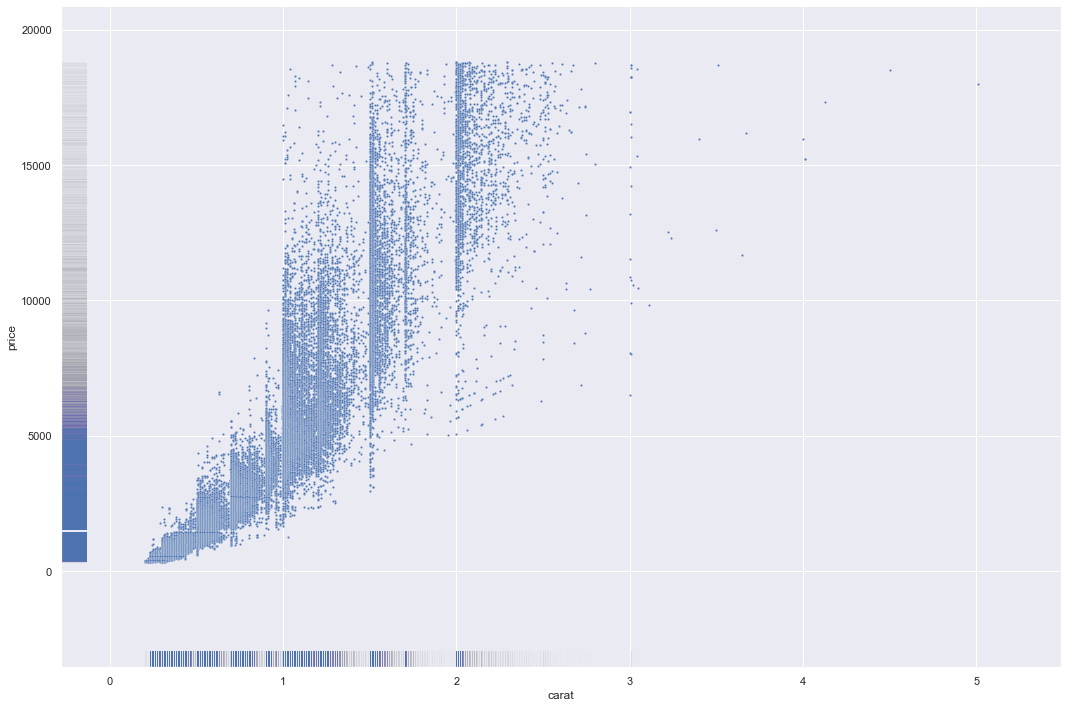

In [400]:
sns.relplot(data=diamonds, x="carat", y="price", s=5, height=10, aspect=1.5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005,)

# Categorical plots - Графики категориального распределения
## [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)
- [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) (with kind="strip"; the default) - dots as strip
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) (with kind="swarm") - dots as tree
- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) (with kind="box") - Japanese candle
- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) (with kind="violin") - Vagina
- [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) (with kind="boxen") - Hanoi Towers
- [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) (with kind="point") - two segments and one median
- [barplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.barplot) (with kind="bar") - just candle
- [countplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.countplot) (with kind="count") - improvised histogram (looks like a multiple="dodge")

### sns.stripplot

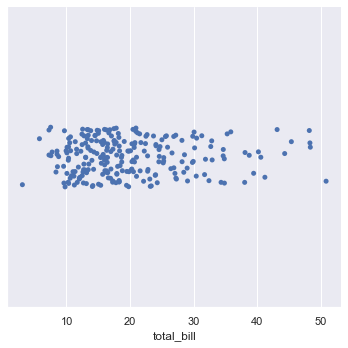

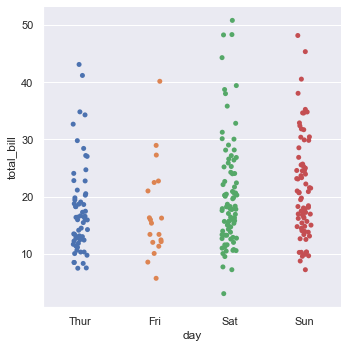

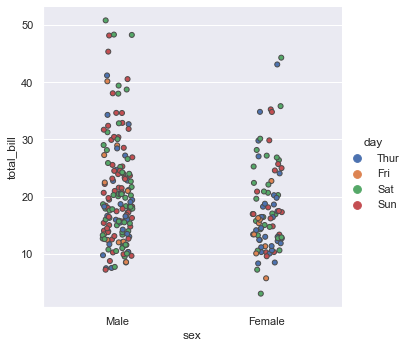

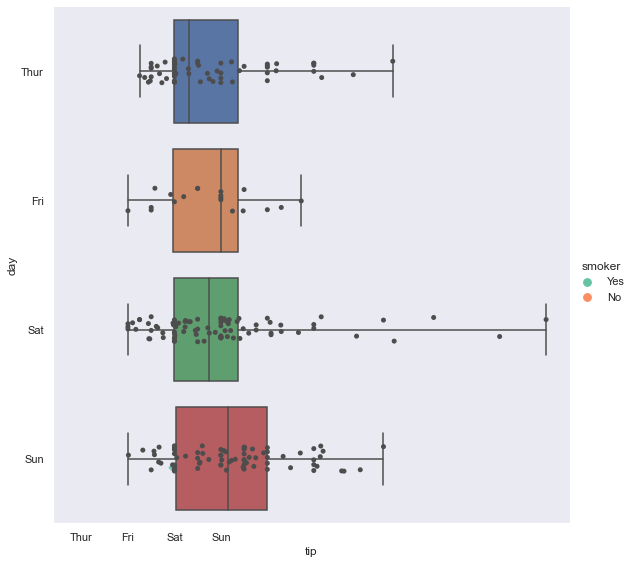

In [492]:
sns.catplot(data=tips, x="total_bill", kind='strip')
sns.catplot(x="day", y="total_bill", data=tips)
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, linewidth=1)
sns.catplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", height=8, marker="D",
                   edgecolor="gray", alpha=.9)
ba = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ba = sns.stripplot(x="tip", y="day", data=tips, color=".3")

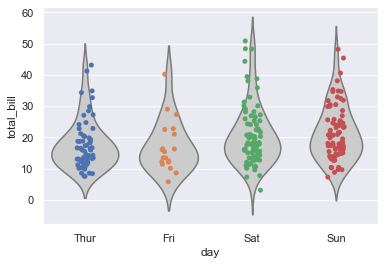

In [446]:
ax = sns.violinplot(x="day", y="total_bill", data=tips,
                     inner=None, color=".8")
ax = sns.stripplot(x="day", y="total_bill", data=tips)

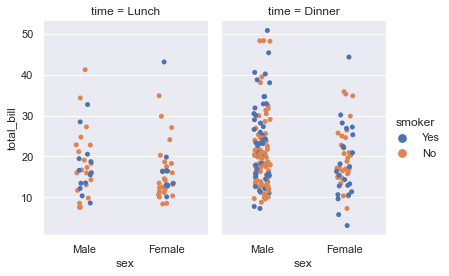

In [435]:
sns.catplot(x="sex", y="total_bill",
                 hue="smoker", col="time",
                 data=tips, kind="strip",
                 height=4, aspect=.7);

### sns.swarmplot

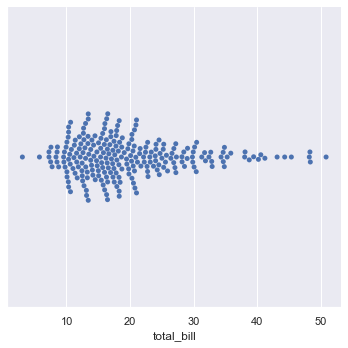

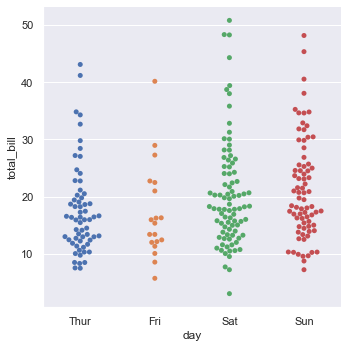

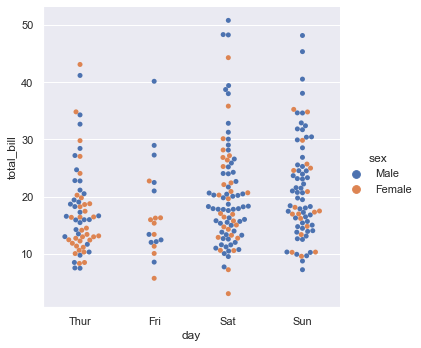

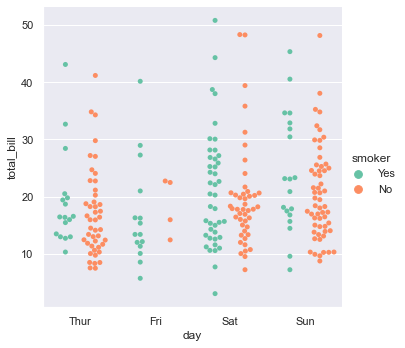

In [445]:
sns.catplot(x="total_bill",data=tips, kind="swarm")
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm")
sns.catplot(x="day", y="total_bill", hue="sex", data=tips,kind="swarm")
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set2", dodge=True, kind="swarm")

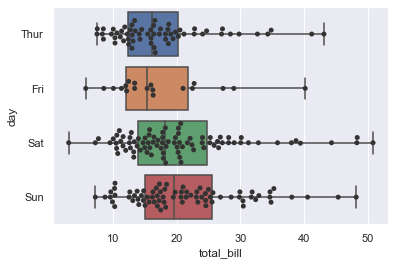

In [443]:
ax = sns.boxplot(x="total_bill", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="total_bill", y="day", data=tips, color=".2")

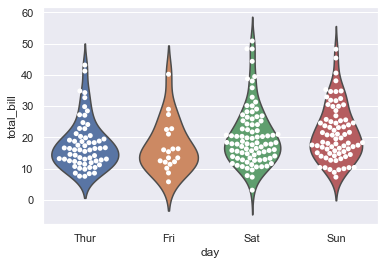

In [447]:
ax = sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
ax = sns.swarmplot(x="day", y="total_bill", data=tips,
                   color="white", edgecolor="gray")

### sns.boxplot

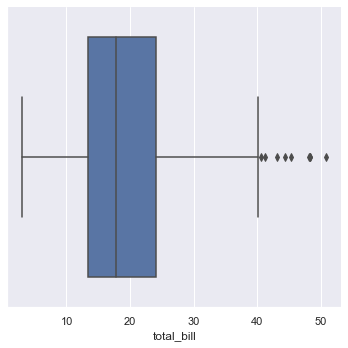

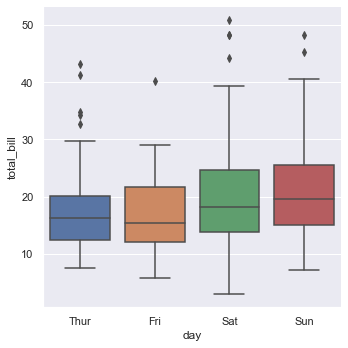

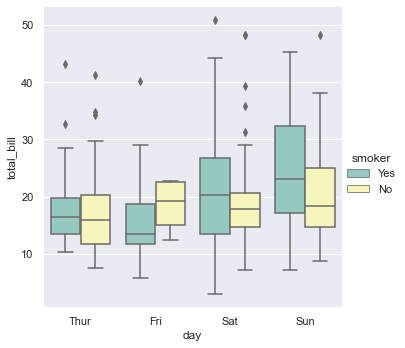

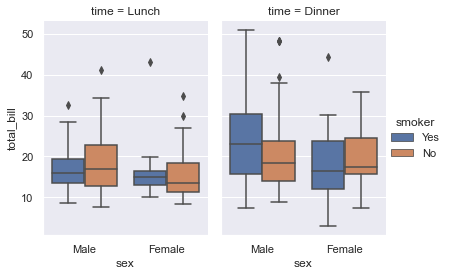

In [452]:
sns.catplot(data=tips, x="total_bill", kind='box')
sns.catplot(x="day", y="total_bill", data=tips, kind="box")
sns.catplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3", kind="box")
sns.catplot(x="sex", y="total_bill",
                 hue="smoker", col="time",
                 data=tips, kind="box",
                 height=4, aspect=.7);

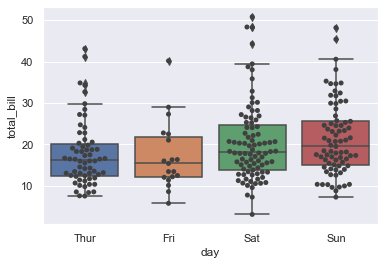

In [451]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

### sns.violinplot

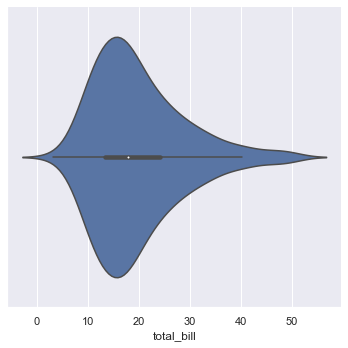

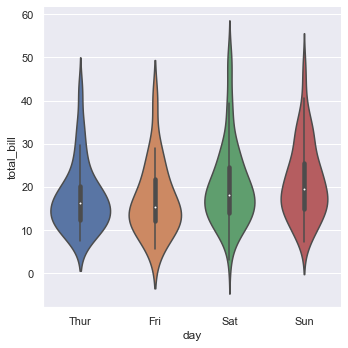

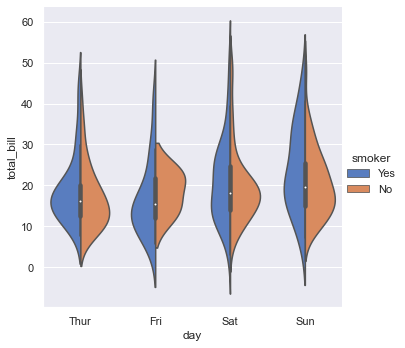

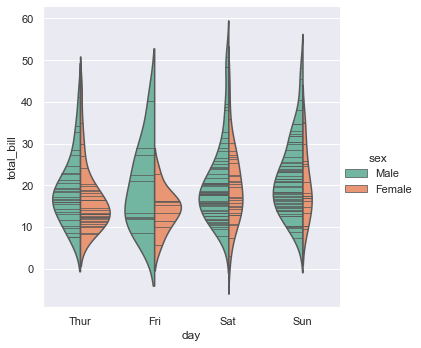

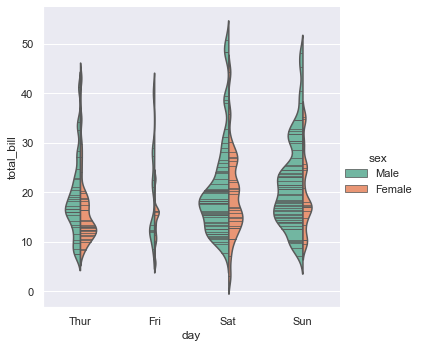

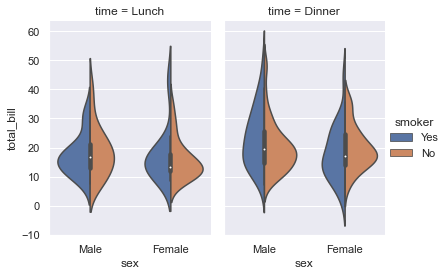

In [458]:
sns.catplot(data=tips, x="total_bill", kind='violin')
sns.catplot(x="day", y="total_bill", data=tips, kind='violin')
sns.catplot(x="day", y="total_bill", hue="smoker",
                     data=tips, palette="muted", split=True, kind='violin')
sns.catplot(x="day", y="total_bill", hue="sex",
                     data=tips, palette="Set2", split=True,
                     scale="count", inner="stick", kind='violin')
sns.catplot(x="day", y="total_bill", hue="sex",
                     data=tips, palette="Set2", split=True,
                     scale="count", inner="stick",
                     scale_hue=False, bw=.2, kind='violin')
sns.catplot(x="sex", y="total_bill",
                     hue="smoker", col="time",
                     data=tips, kind="violin", split=True,
                     height=4, aspect=.7);

### sns.boxenplot

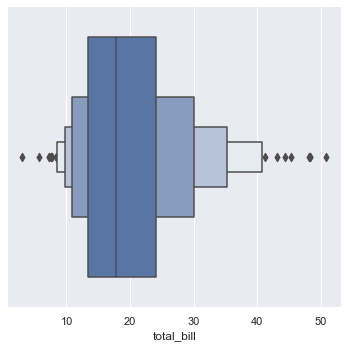

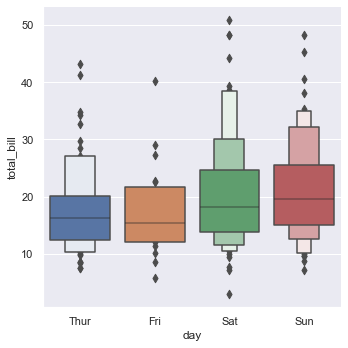

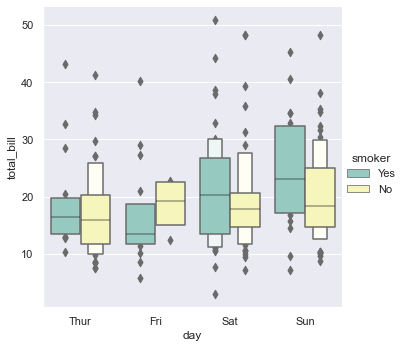

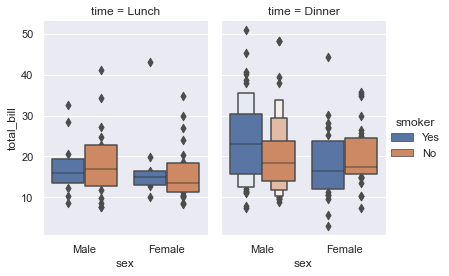

In [464]:
sns.catplot(data=tips, x="total_bill", kind='boxen')
sns.catplot(x="day", y="total_bill", data=tips, kind='boxen')
sns.catplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="Set3", kind='boxen')
sns.catplot(x="sex", y="total_bill",
                 hue="smoker", col="time",
                 data=tips, kind="boxen",
                 height=4, aspect=.7);

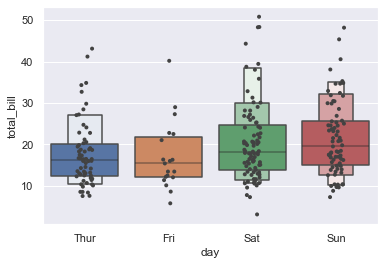

In [463]:
ax = sns.boxenplot(x="day", y="total_bill", data=tips,
                    showfliers=False)
ax = sns.stripplot(x="day", y="total_bill", data=tips,
                    size=4, color=".26")

### sns.pointplot

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8666666666666667, 0.5176470588235295, 0.3215686274509804)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


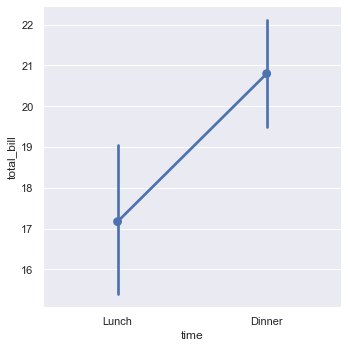

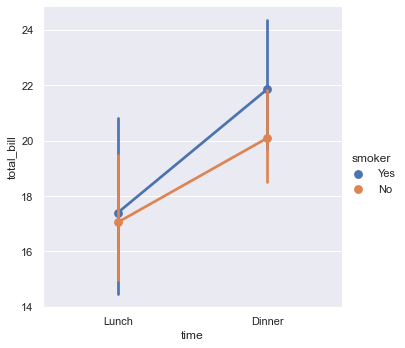

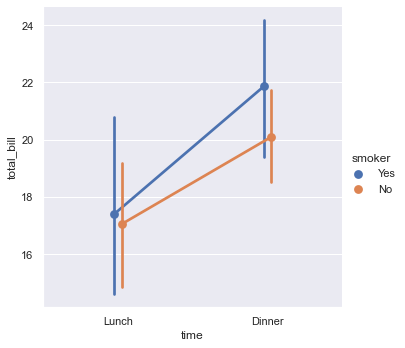

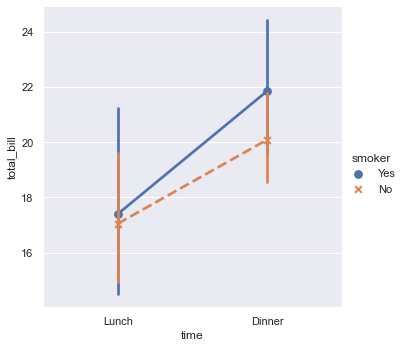

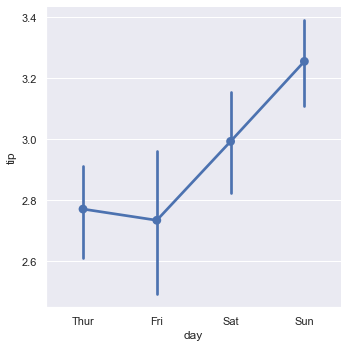

In [473]:
sns.catplot(data=tips, x="time", y="total_bill", kind='point')
sns.catplot(x="time", y="total_bill", hue="smoker",data=tips, kind='point')
sns.catplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True, kind='point')
sns.catplot(x="time", y="total_bill", hue="smoker",data=tips,markers=["o", "x"],linestyles=["-", "--"], kind='point')
sns.catplot(x="day", y="tip", data=tips, ci=68, kind='point')

### sns.barplot

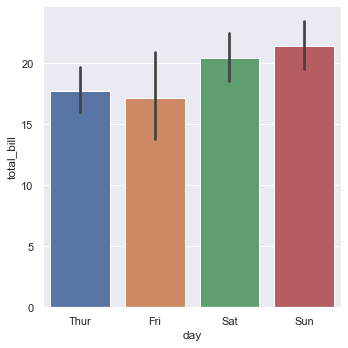

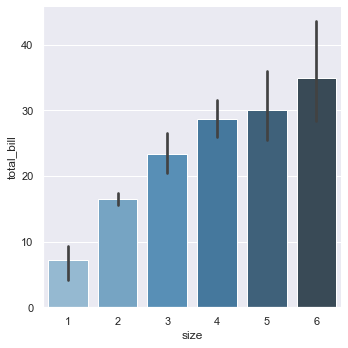

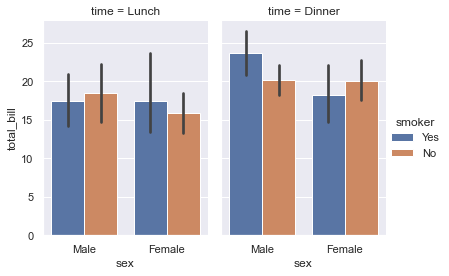

In [481]:
sns.catplot(x="day", y="total_bill", data=tips, kind="bar")
sns.catplot(x="size", y="total_bill", data=tips, palette="Blues_d", kind="bar")
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="bar",height=4, aspect=.7);

### sns.countplot

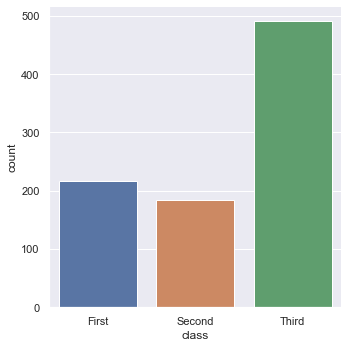

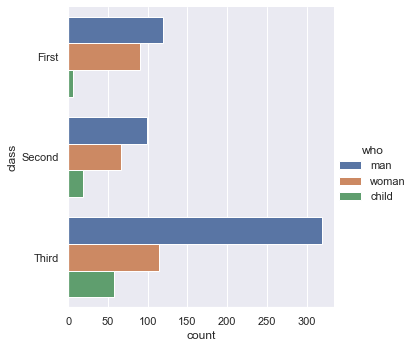

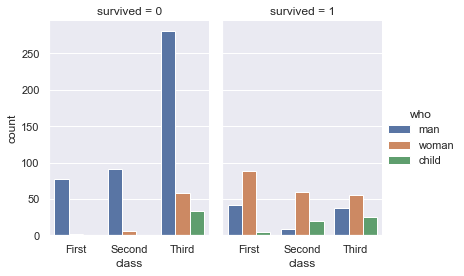

In [485]:
sns.catplot(x="class", data=titanic, kind="count")
sns.catplot(y="class", hue="who", data=titanic, kind="count")
sns.catplot(x="class", hue="who", col="survived",data=titanic, kind="count",height=4, aspect=.7);

# Regression plots - Графики регрессии
## [sns.lmplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.lmplot)
- [regplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.regplot) - one to one
- [residplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.residplot) - residuals

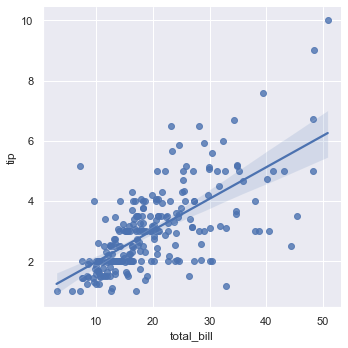

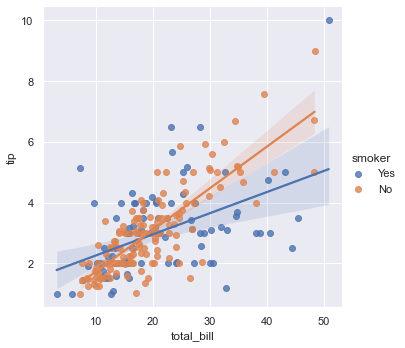

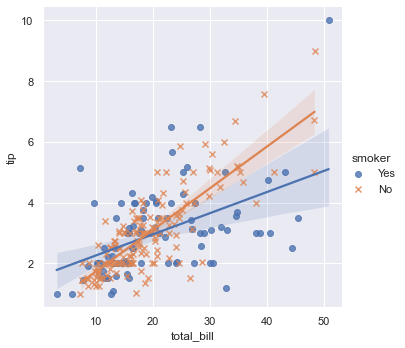

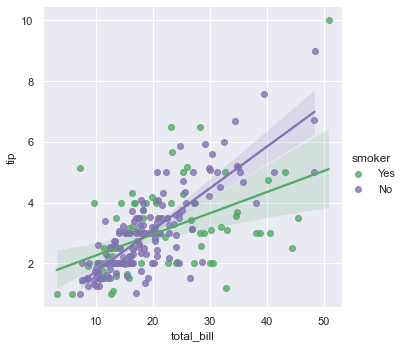

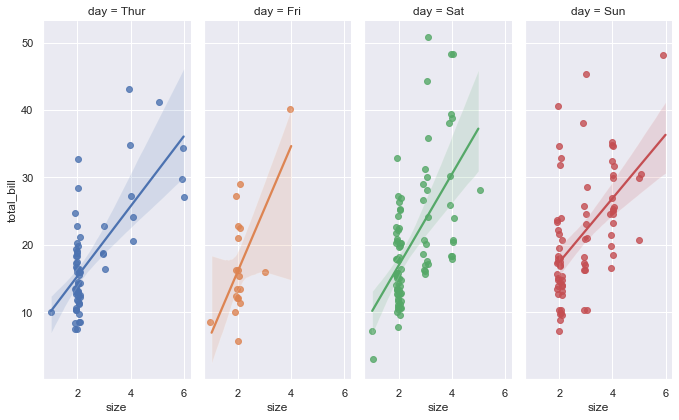

In [507]:
sns.lmplot(x="total_bill", y="tip", data=tips)
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette=dict(Yes="g", No="m"))
sns.lmplot(x="size", y="total_bill", hue="day", col="day", data=tips, height=6, aspect=.4, x_jitter=.1)

<AxesSubplot:xlabel='x_var', ylabel='y_var'>

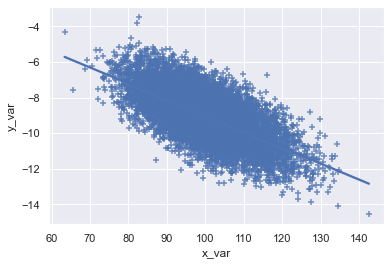

In [509]:
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
sns.regplot(x=x, y=y, marker="+")

# Matrix plots - Матричное распределение
### [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) - zones
### [sns.clustermap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.clustermap) - lines

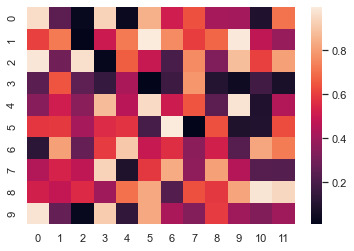

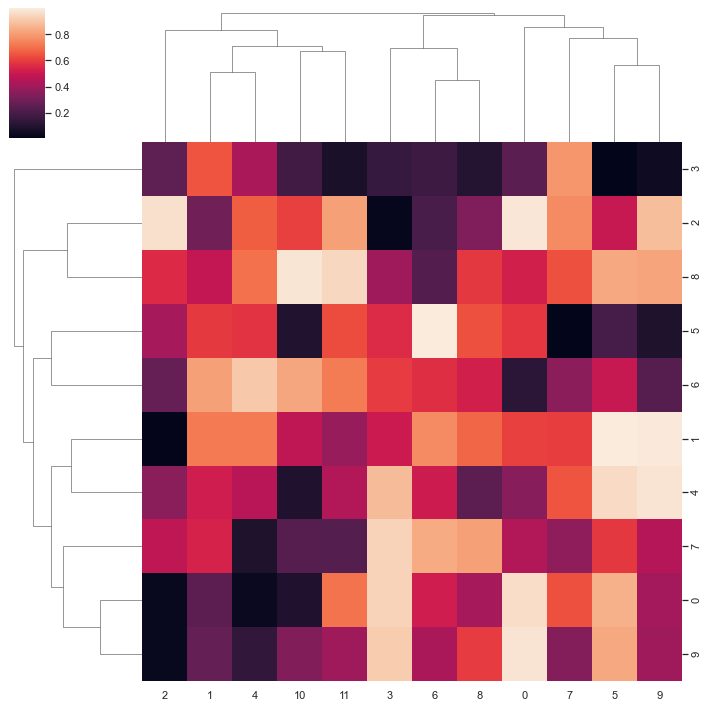

In [513]:
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)
sns.clustermap(uniform_data)

In [515]:
uniform_data

array([[0.96300702, 0.24765844, 0.02886797, 0.93598468, 0.03295604,
        0.84793768, 0.51283403, 0.63784507, 0.41677875, 0.40691345,
        0.09309021, 0.70593732],
       [0.60346932, 0.72263593, 0.01309596, 0.50051136, 0.72381225,
        0.99742002, 0.76079868, 0.5993567 , 0.68111534, 0.9917861 ,
        0.47444058, 0.38294036],
       [0.98417843, 0.29513545, 0.9702782 , 0.02307094, 0.66333971,
        0.49412401, 0.19856118, 0.76178055, 0.32815892, 0.87987156,
        0.60748296, 0.80778071],
       [0.24060125, 0.64437141, 0.25101275, 0.15135517, 0.42439022,
        0.00955008, 0.16468871, 0.78217327, 0.10445121, 0.0448603 ,
        0.17996578, 0.07432772],
       [0.34767531, 0.51217155, 0.35069274, 0.87672434, 0.45827909,
        0.95325956, 0.50500203, 0.64329498, 0.24484295, 0.97708607,
        0.09060128, 0.44451485],
       [0.58358992, 0.58883954, 0.41759092, 0.55715192, 0.57522867,
        0.19102033, 0.99878076, 0.00829438, 0.63810399, 0.08698316,
        0.09348781,

In [535]:
u = np.array([[1,2,3,-4,5,6],[0,1,2,-3,4,5],[2,3,4,5,10,-7],[-2,2,2,2,2,0],[2,1,11,-4,5,3]])

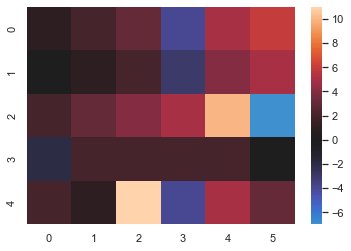

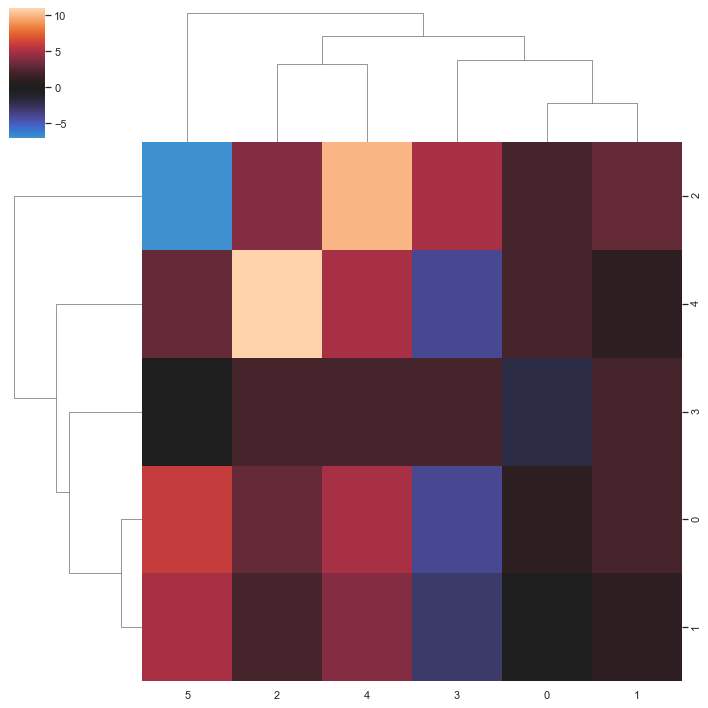

In [537]:
sns.heatmap(u, center=0)
sns.clustermap(u, center=0)

<AxesSubplot:>

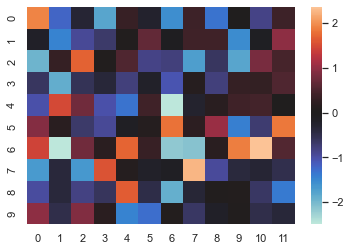

In [534]:
sns.heatmap(normal_data, center=0)

In [532]:
normal_data = np.random.randn(10, 12)

In [533]:
normal_data

array([[ 1.9120266 , -1.21970099, -0.31511384, -1.80298112,  0.32424998,
        -0.24080353, -1.55029207,  0.38818403, -1.32948565,  0.04494889,
        -0.83239386,  0.38085491],
       [-0.19513331, -1.45994694, -0.93800913, -0.6882385 ,  0.07988961,
         0.65999716, -0.07109314,  0.4028564 ,  0.39116047, -1.54213345,
        -0.11474218,  0.97054904],
       [-1.95629302,  0.30533506,  1.69044659,  0.06543289,  0.53363739,
        -0.83385079, -0.78868971, -1.73905551, -0.62058855, -1.79730898,
         0.84391094,  0.45434655],
       [-0.63083515, -1.88477293, -0.5791271 , -0.36676856, -0.78594528,
        -0.2189095 , -1.06004461,  0.12495123, -0.77372415,  0.29630147,
         0.27527675,  0.53255298],
       [-1.03129368,  1.47635081,  0.76400937, -1.02786525, -1.32734355,
         0.39092351, -2.49892856, -0.26368849,  0.16641563,  0.39061906,
         0.4381145 ,  0.04625437],
       [ 0.91273363,  0.17439728, -0.67625713, -0.93513822, -0.12994212,
         0.10356849,  

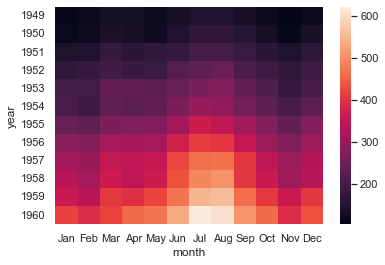

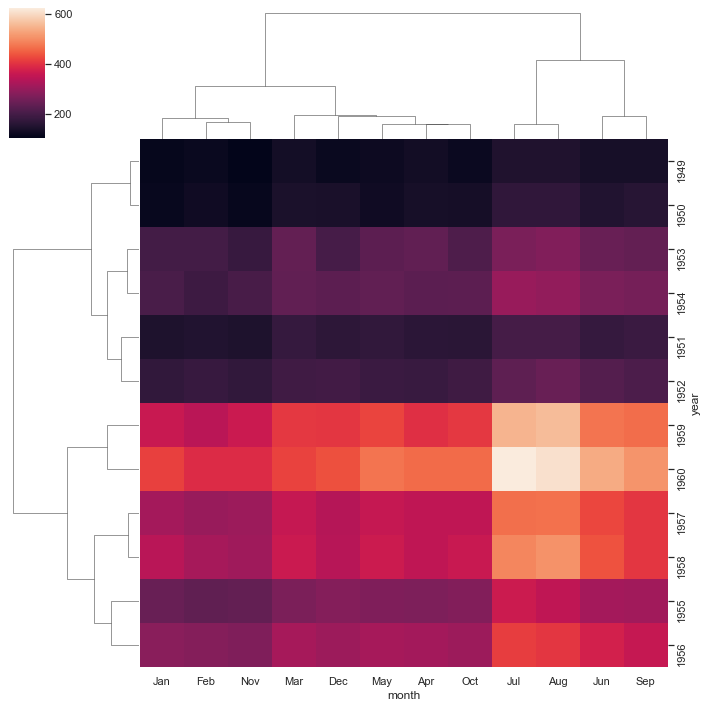

In [545]:
sns.heatmap(flights_wide)
sns.clustermap(flights_wide)

<AxesSubplot:xlabel='month', ylabel='year'>

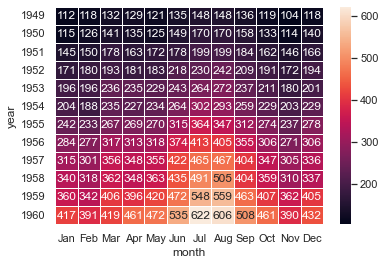

In [550]:
sns.heatmap(flights_wide, annot=True, fmt="d", linewidths=.5)

<AxesSubplot:xlabel='month', ylabel='year'>

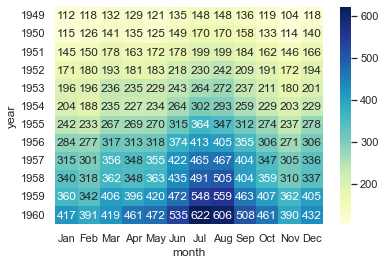

In [549]:
sns.heatmap(flights_wide, annot=True, fmt="d", cmap="YlGnBu")

<AxesSubplot:xlabel='month', ylabel='year'>

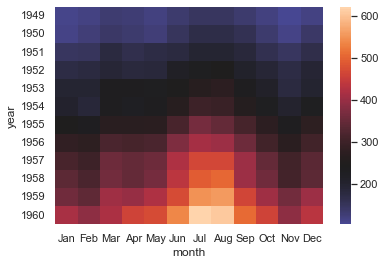

In [574]:
sns.heatmap(flights_wide, center=flights_wide.loc[1955, "Jan"])

In [573]:
flights_wide.loc[1955,"Jan"]

242

In [570]:
flights_wide

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432

# Multi-plot grids - Несколько участков 
### Facet grids
##### [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) - Multi-plot grid for plotting conditional relationships.
### Pair grids
##### [pairplot](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.pairplot) - Plot pairwise relationships in a dataset.
###### [PairGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.PairGrid) - Subplot grid for plotting pairwise relationships in a dataset.
### Joint grids
###### [jointplot](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.jointplot) - Draw a plot of two variables with bivariate and univariate graphs.
##### [JointGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.JointGrid) - Grid for drawing a bivariate plot with marginal univariate plots.

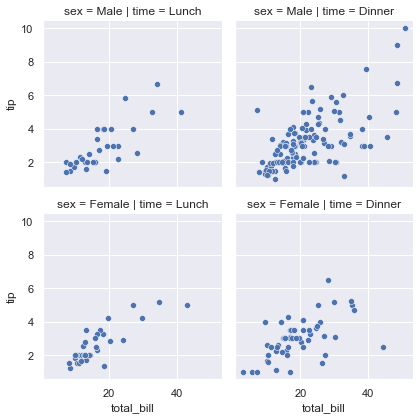

In [583]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

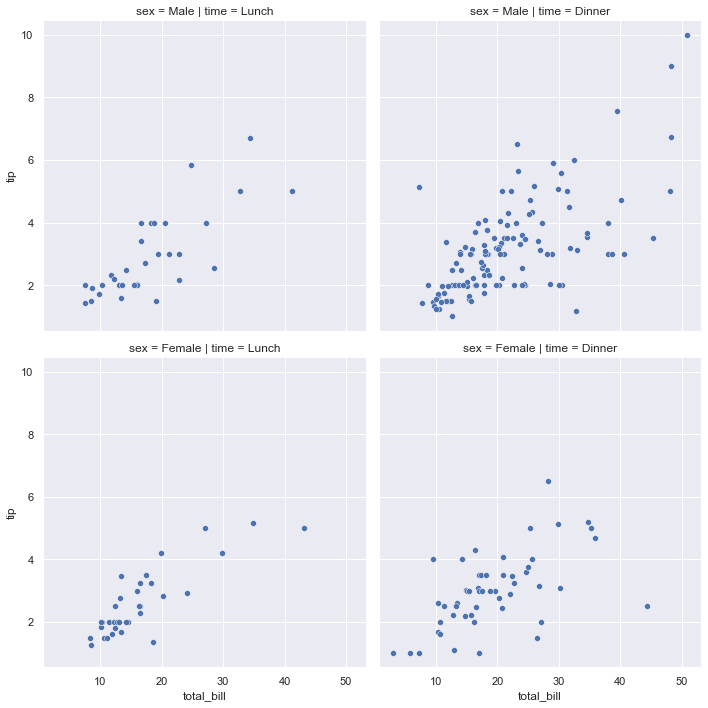

In [587]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time",  row="sex")

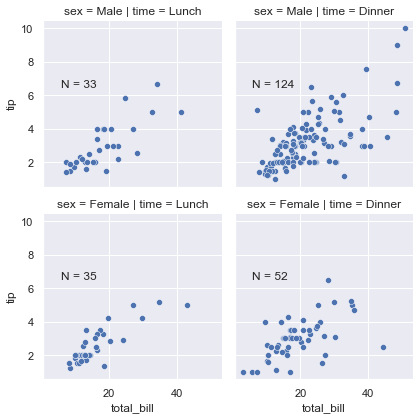

In [592]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
g = sns.FacetGrid(tips, col="time",row="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)


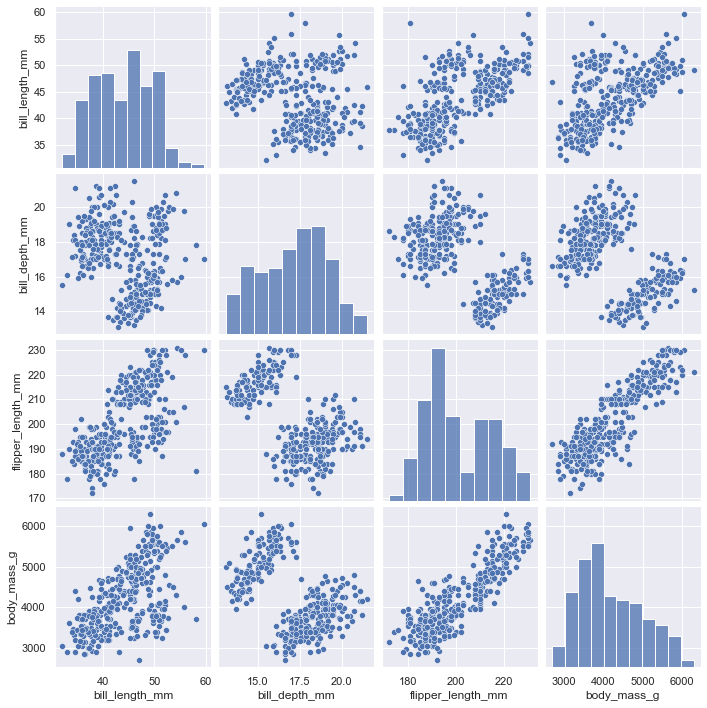

In [595]:
sns.pairplot(penguin)

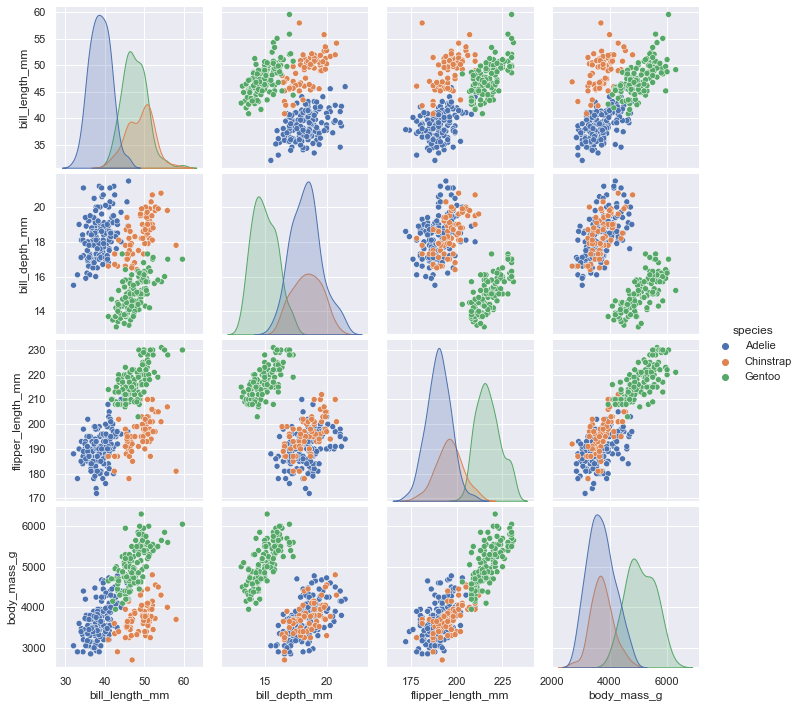

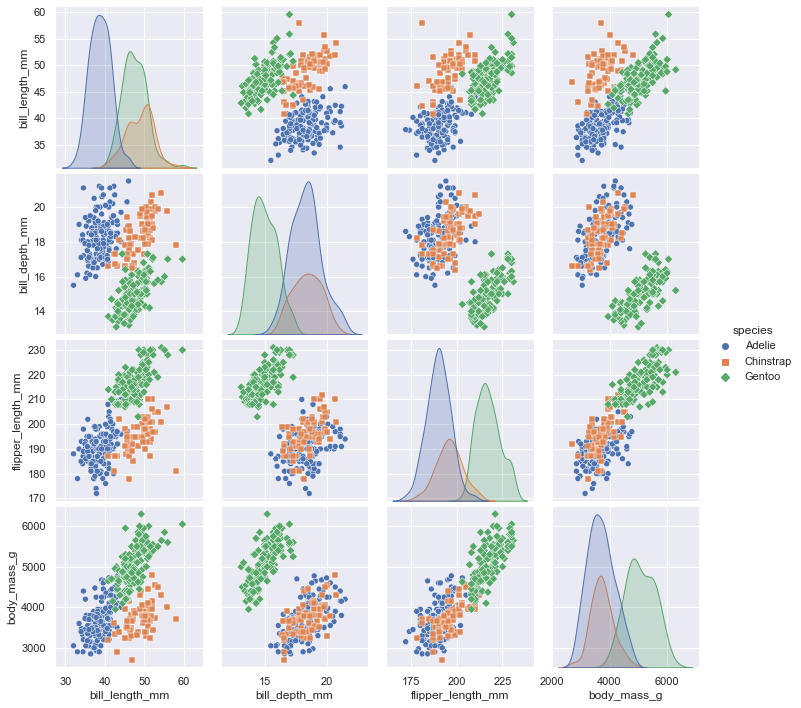

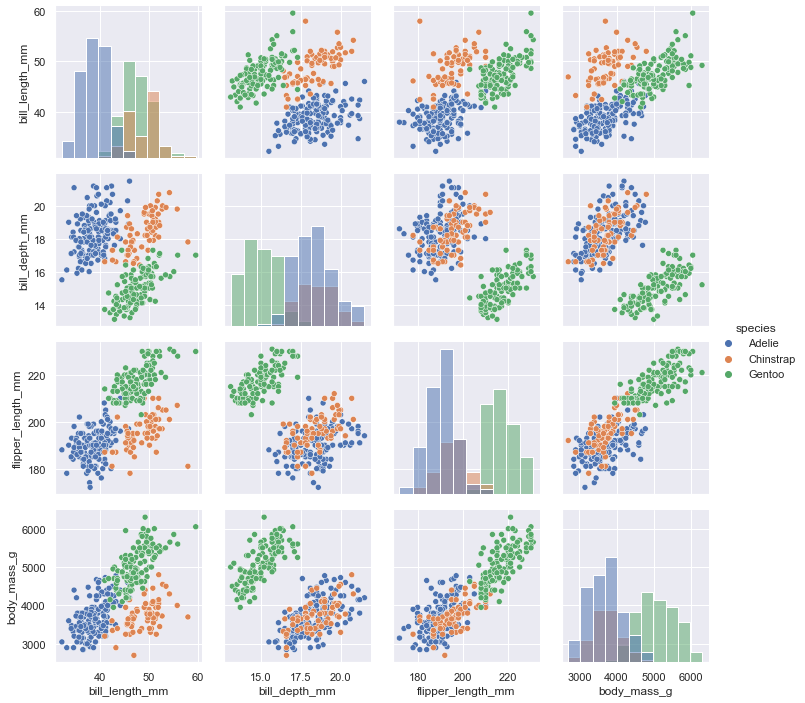

In [608]:
sns.pairplot(penguins, hue="species")
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

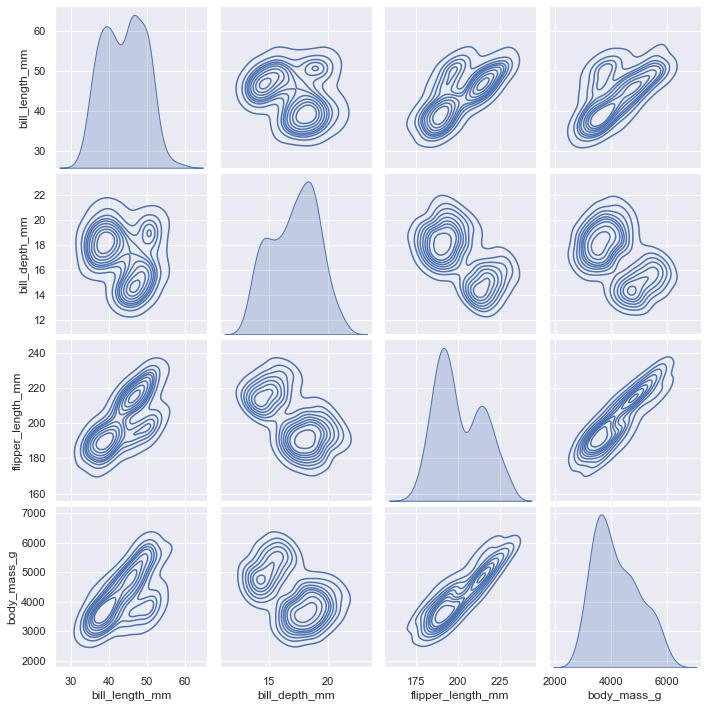

In [602]:
sns.pairplot(penguins, kind="kde")


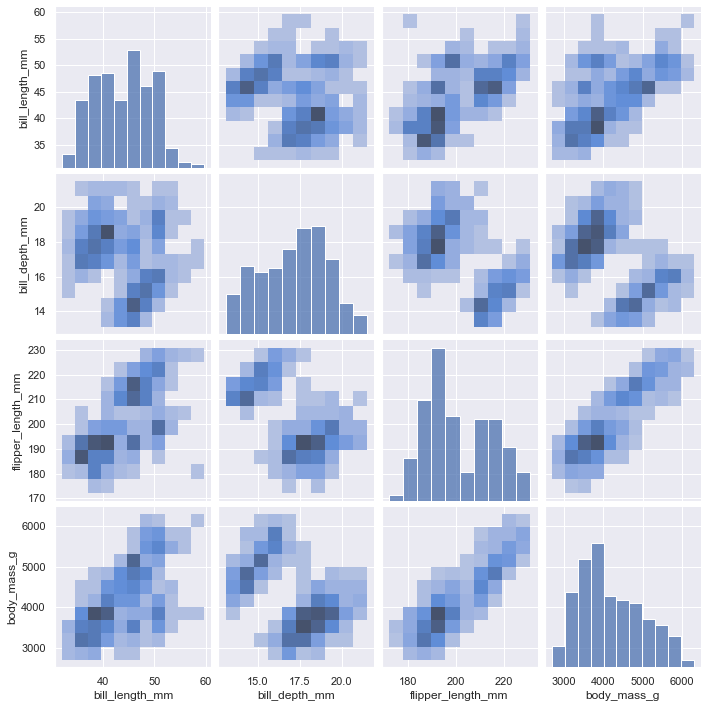

In [604]:
sns.pairplot(penguins, kind="hist")

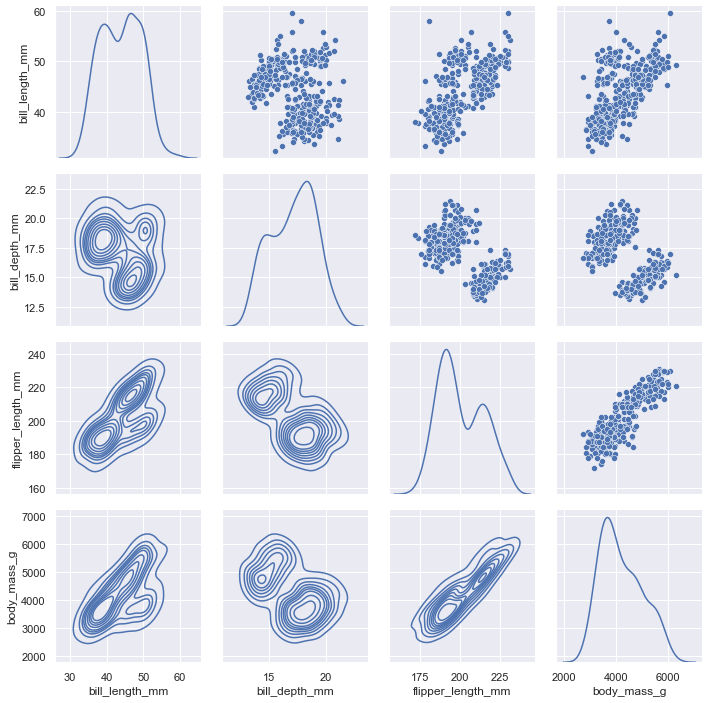

In [606]:
g = sns.PairGrid(penguins, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

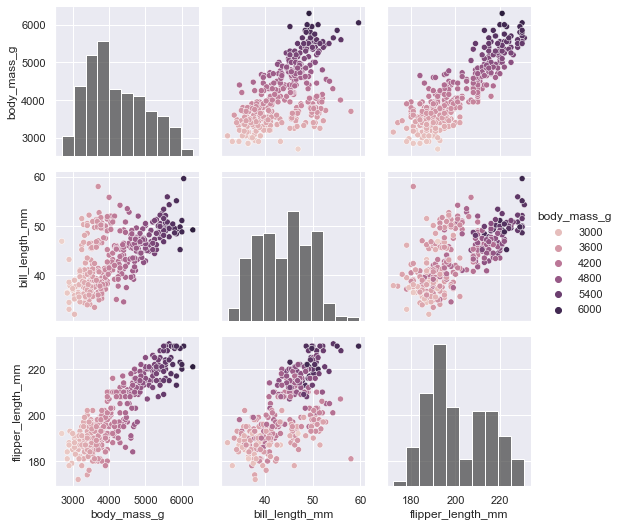

In [609]:
variables = ["body_mass_g", "bill_length_mm", "flipper_length_mm"]
g = sns.PairGrid(penguins, hue="body_mass_g", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

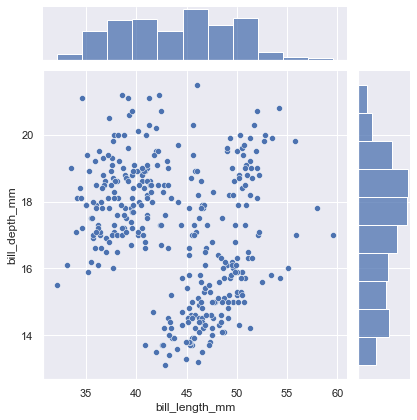

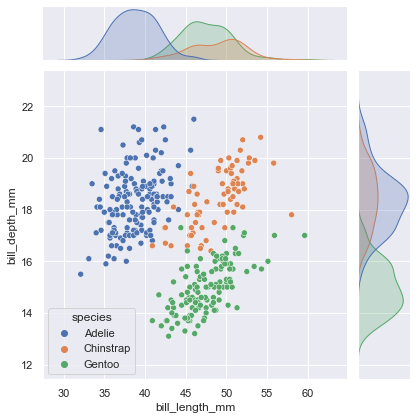

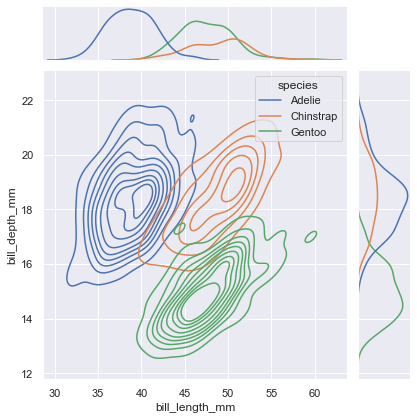

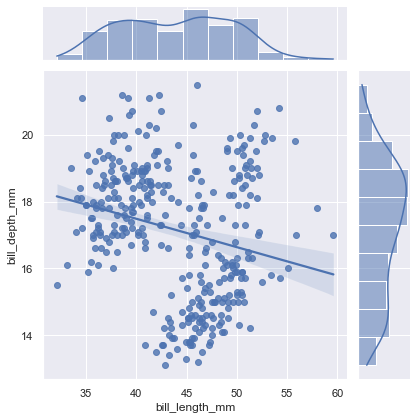

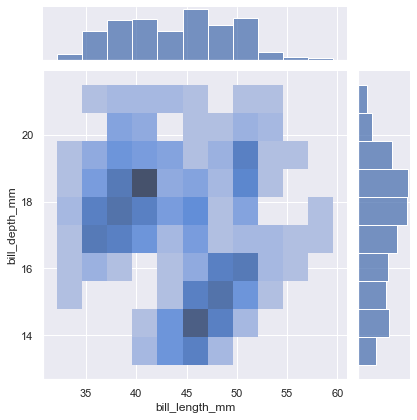

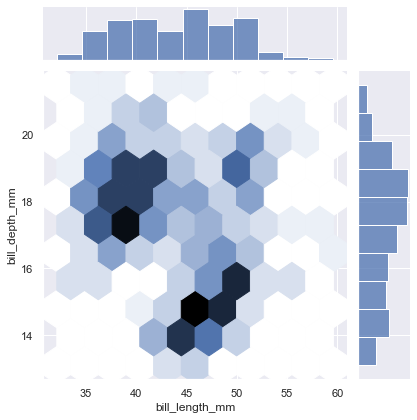

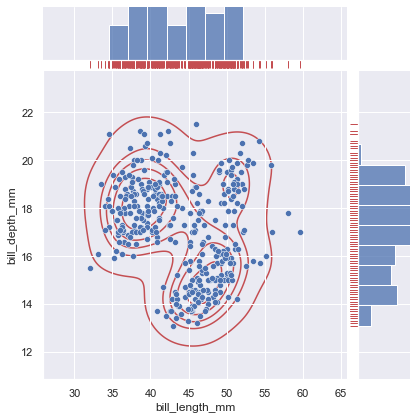

In [616]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hist")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# Theming
### [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) - Set aspects of the visual theme for all matplotlib and seaborn plots.
### [axes_style](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style) - Get the parameters that control the general style of the plots.
### [set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style) - Set the parameters that control the general style of the plots.
### [plotting_context](https://seaborn.pydata.org/generated/seaborn.plotting_context.html#seaborn.plotting_context) - Get the parameters that control the scaling of plot elements.
### [set_context](https://seaborn.pydata.org/generated/seaborn.set_context.html#seaborn.set_context) - Set the parameters that control the scaling of plot elements.
### [set_color_codes](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes) - Change how matplotlib color shorthands are interpreted.
### [reset_defaults](https://seaborn.pydata.org/generated/seaborn.reset_defaults.html#seaborn.reset_defaults) - Restore all RC params to default settings.
### [reset_orig](https://seaborn.pydata.org/generated/seaborn.reset_orig.html#seaborn.reset_orig) - Restore all RC params to original settings (respects custom rc).
### [set](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set) - Alias for set_theme(), which is the preferred interface.


<AxesSubplot:>

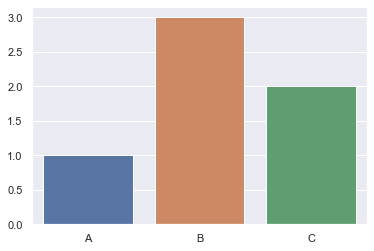

In [620]:
sns.set_theme()
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

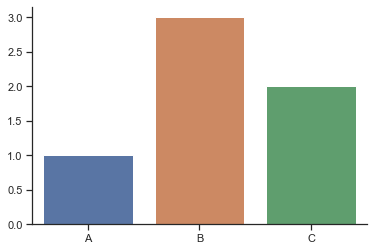

In [638]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

In [622]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

<AxesSubplot:>

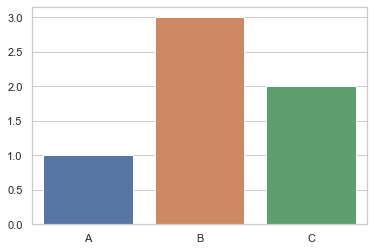

In [637]:
sns.axes_style()
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

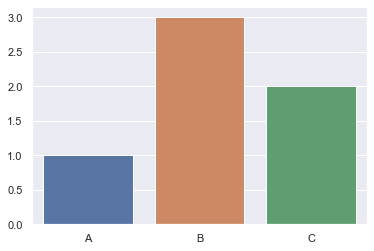

In [629]:
with sns.axes_style("darkgrid"):
    sns.barplot(x=["A","B","C"],y=[1,3,2])

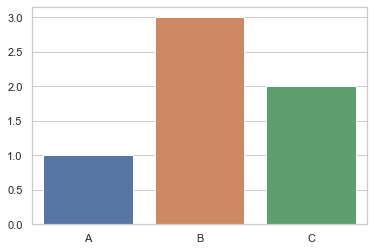

In [631]:
with sns.axes_style("whitegrid"):
    sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

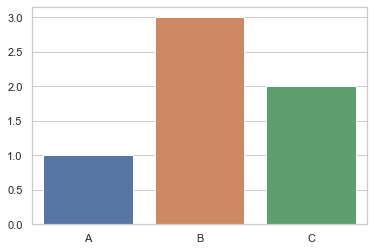

In [641]:
sns.set_style("whitegrid")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

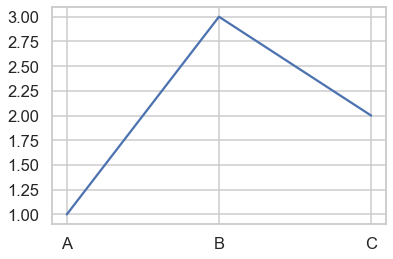

In [642]:
with sns.plotting_context("talk"):
    sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

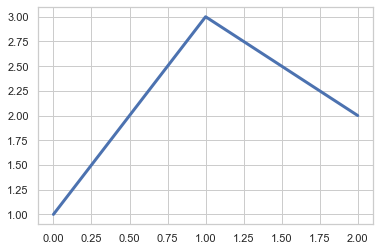

In [643]:
sns.set_context("notebook", rc={"lines.linewidth": 3})
sns.lineplot(x=[0, 1, 2], y=[1, 3, 2])


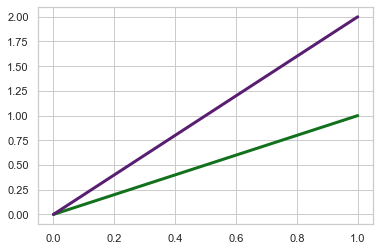

In [644]:
sns.set_color_codes("dark")
_ = plt.plot([0, 1], color="g")
_ = plt.plot([0, 2], color="m")


<AxesSubplot:>

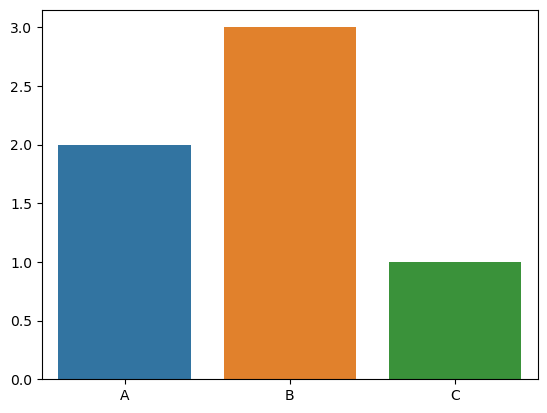

In [646]:
sns.reset_defaults()
sns.barplot(x=["A", "B", "C"], y=[2,3,1])

# Color palettes - Цвета
### [set_palette](https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette) - Set the matplotlib color cycle using a seaborn palette.
### [color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) - Return a list of colors or continuous colormap defining a palette.
### [husl_palette](https://seaborn.pydata.org/generated/seaborn.husl_palette.html#seaborn.husl_palette) - Get a set of evenly spaced colors in HUSL hue space.
### [hls_palette](https://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette) - Get a set of evenly spaced colors in HLS hue space.
### [cubehelix_palette](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette) - Make a sequential palette from the cubehelix system.
### [dark_palette](https://seaborn.pydata.org/generated/seaborn.dark_palette.html#seaborn.dark_palette) - Make a sequential palette that blends from dark to color.
### [light_palette](https://seaborn.pydata.org/generated/seaborn.light_palette.html#seaborn.light_palette) - Make a sequential palette that blends from light to color.
### [diverging_palette](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette) - Make a diverging palette between two HUSL colors.
### [blend_palette](https://seaborn.pydata.org/generated/seaborn.blend_palette.html#seaborn.blend_palette) - Make a palette that blends between a list of colors.
### [xkcd_palette](https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html#seaborn.xkcd_palette) - Make a palette with color names from the xkcd color survey.
### [crayon_palette](https://seaborn.pydata.org/generated/seaborn.crayon_palette.html#seaborn.crayon_palette) - Make a palette with color names from Crayola crayons.
### [mpl_palette](https://seaborn.pydata.org/generated/seaborn.mpl_palette.html#seaborn.mpl_palette) - Return discrete colors from a matplotlib palette.

In [649]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [650]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [651]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [656]:
sns.color_palette("husl",13)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9218528551477547, 0.500345433264, 0.19606247053399534),
 (0.756593795426372, 0.58660455674609, 0.19460548454202936),
 (0.6280838378584804, 0.6317149736053096, 0.19371846323785552),
 (0.44127702936426016, 0.6747986506725627, 0.19278677787286805),
 (0.19925855442314272, 0.6935861010390585, 0.4349484671340832),
 (0.20730980534421067, 0.6820252887361699, 0.5931178995944008),
 (0.213603436221035, 0.6724447149771248, 0.6900417229996091),
 (0.2218708221705632, 0.6590814541823624, 0.7990680761766646),
 (0.38670894369284947, 0.6148978276981065, 0.9585912355668605),
 (0.7049741506310939, 0.5248938690186019, 0.9581527270311664),
 (0.9538763597142671, 0.3594595647605631, 0.95756585161213),
 (0.9637107389395935, 0.4095260281088575, 0.7436447221919831)]

In [657]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [659]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

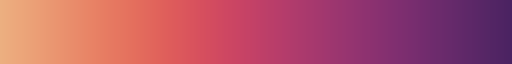

In [660]:
sns.color_palette("flare", as_cmap=True)

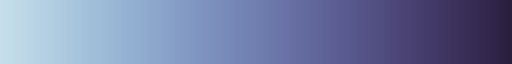

In [661]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

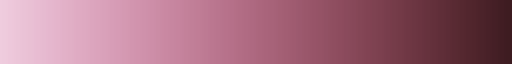

In [665]:
sns.color_palette("ch:s=.9,rot=-.1", as_cmap=True)

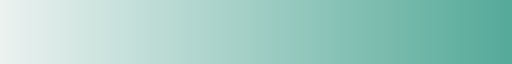

In [666]:
sns.color_palette("light:#5A9", as_cmap=True)

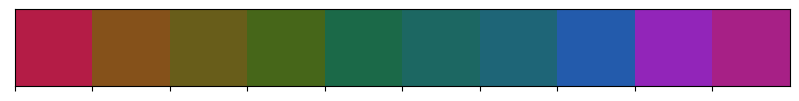

In [667]:
sns.palplot(sns.husl_palette(10, l=.4))

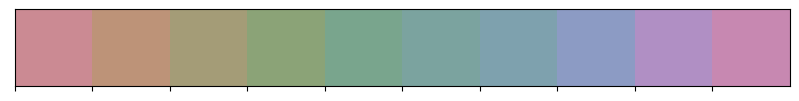

In [669]:
sns.palplot(sns.husl_palette(10, s=.4))

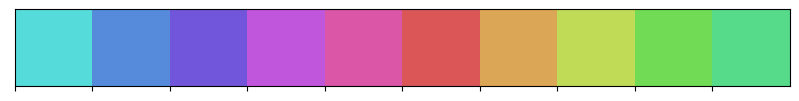

In [670]:
sns.palplot(sns.hls_palette(10, h=.5))

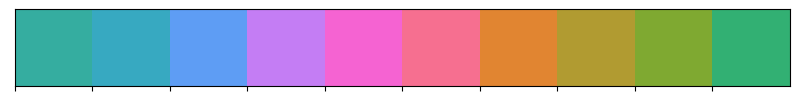

In [672]:
sns.palplot(sns.husl_palette(10, h=.5))

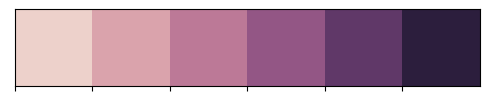

In [673]:
sns.palplot(sns.cubehelix_palette())

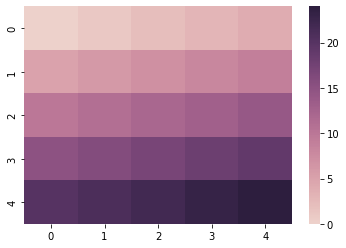

In [678]:
x = arange(25).reshape(5, 5)
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)

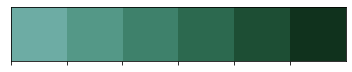

In [679]:
sns.palplot(sns.color_palette("ch:2,r=.2,l=.6"))